In [ ]:
!pip install -qU  malariagen_data scikit-allel petl

In [2]:
import malariagen_data
import allel
import numpy as np
import pandas as pd
import functools
#import dask
#from dask.diagnostics.progress import ProgressBar
#dask.config.set(**{'array.slicing.split_large_chunks': True})
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
#import matplotlib_venn as venn
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
from tqdm.dask import TqdmCallback
from tqdm.auto import tqdm

In [32]:
plt.rcdefaults()
sns.reset_defaults()
rcParams = plt.rcParams
base_font_size = 10
rcParams['font.size'] = 9
rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = base_font_size
rcParams['axes.linewidth'] = .5
rcParams['lines.linewidth'] = .5
rcParams['patch.linewidth'] = .5
rcParams['ytick.direction'] = 'out'
rcParams['xtick.direction'] = 'out'
#rcParams['savefig.jpeg_quality'] = 100
rcParams['lines.markeredgewidth'] = .5
rcParams['figure.max_open_warning'] = 1000
rcParams['figure.dpi'] = 120
rcParams['figure.facecolor'] = 'w'

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [5]:
#Mounting Google Drive
import os
import glob
from google.colab import drive
drive.mount("drive")

# make dir
results_dir = "drive/MyDrive/"
os.makedirs(results_dir, exist_ok=True)

Mounted at drive


In [6]:
ag3 = malariagen_data.Ag3()
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0, 3.1, 3.10, 3.11, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9
Results cache           : None
Cohorts analysis        : 20240717
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 11.0.0
Client location         : Oregon, United States (Google Cloud us-west1)
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact support@malariagen.net. For API documentation see 
https://malariagen.github.io/malariagen-data-python/v11.0.0/Ag3.html

In [7]:
## Selecting and defining the samples metadata
sets = ["1191-VO-MULTI-OLOUGHLIN-VMF00106", "1191-VO-MULTI-OLOUGHLIN-VMF00140",
        "AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C"]
df_samples = ag3.sample_metadata(sample_sets=sets)

# Function for plotting

In [8]:
# Compute the figure of sequence divergence
def fig_h12(x, y, title=None,  ax=None, color=None, ylab=None, xlab=None, fig_name=None):
  #define ax
  if ax is None:
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.despine(ax=ax, offset=5)

  # make plot
  ax.plot(x, y, linestyle=' ', marker='o', color=color, ms=0.5)
  # Plot title
  if title:
    ax.set_title(f'{title}')

  # Customize plot
  if ylab:
    ax.set_ylabel('Garud H12')
  if xlab:
    ax.set_xlabel(f'Chrom {xlab} (bp)')

  #ax setting
  ax.set_ylim(0,1)
  xlim=(list(x)[0], list(x)[-1])
  ax.set_xlim(*xlim)
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])
  if fig_name:
    fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/H12_{fig_name}.png", dpi=300, bbox_inches='tight')


# Function to import data

In [9]:
## data - 2R
ydata_2R = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/2R_yty_h12.csv')
pdata_2R = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/2R_pop_h12.csv')

## data - 2L
ydata_2L = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/2L_yty_h12.csv')
pdata_2L = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/2L_pop_h12.csv')

## data - 3R
ydata_3R = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/3R_yty_h12.csv')
pdata_3R = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/3R_pop_h12.csv')

## data - 3L
ydata_3L = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/3L_yty_h12.csv')
pdata_3L = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/3L_pop_h12.csv')

## data - X
ydata_X = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/X_yty_h12.csv')
pdata_X = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/X_pop_h12.csv')

<ipython-input-34-18a3a446549e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-8-5e965acb56b2>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


Text(40928687.0, 0.4, '$Keap1$')

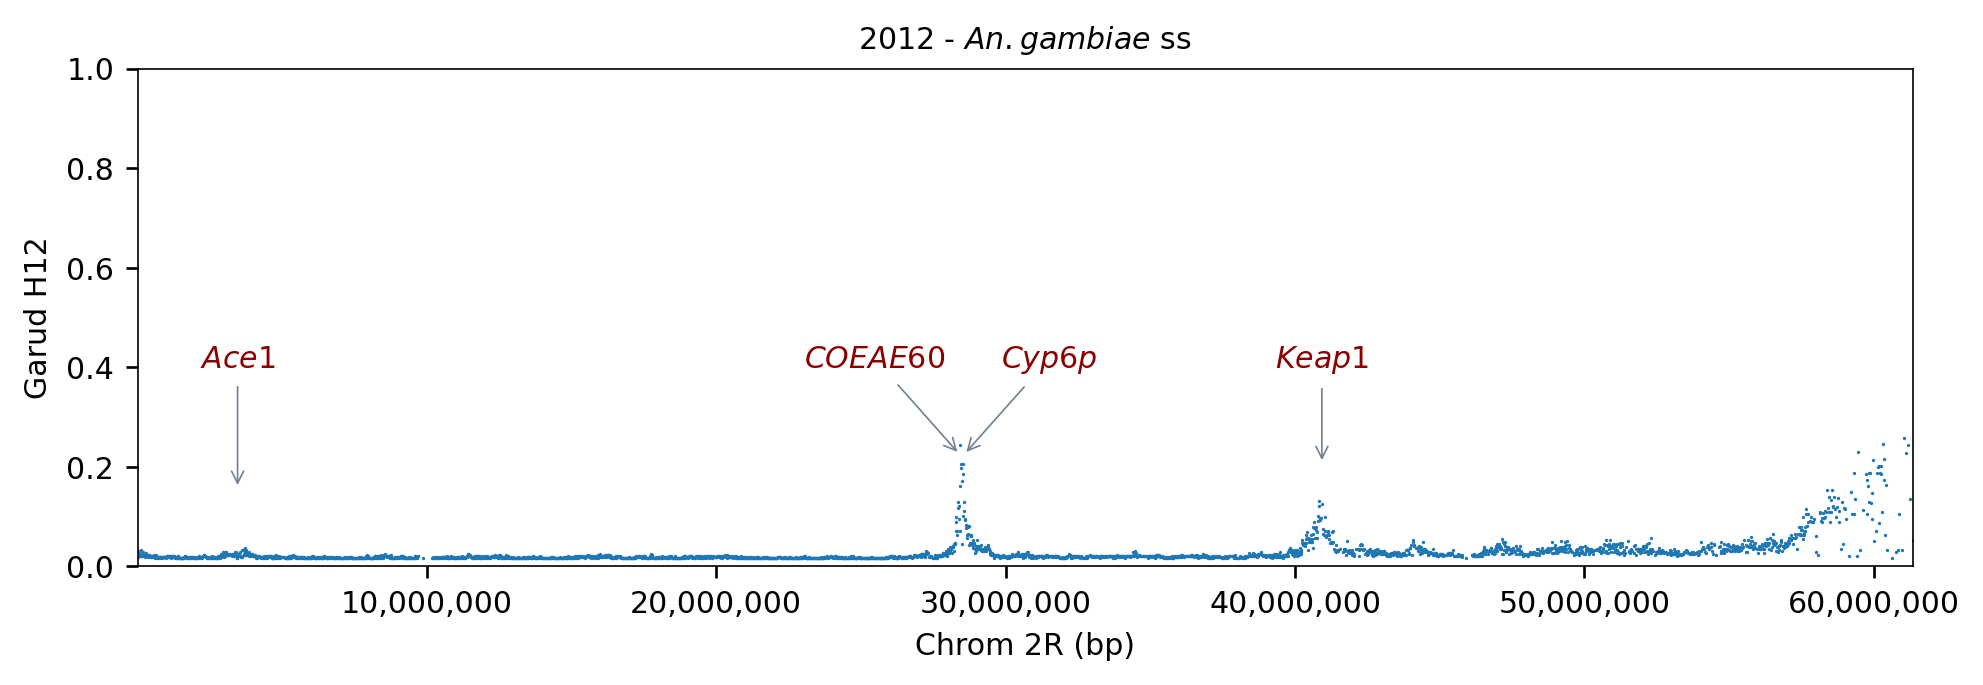

In [34]:
## Garud H12 plot in the chromosome 2
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax0, xlab='2R', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.22), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

<ipython-input-35-b79a5a565c96>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-8-5e965acb56b2>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


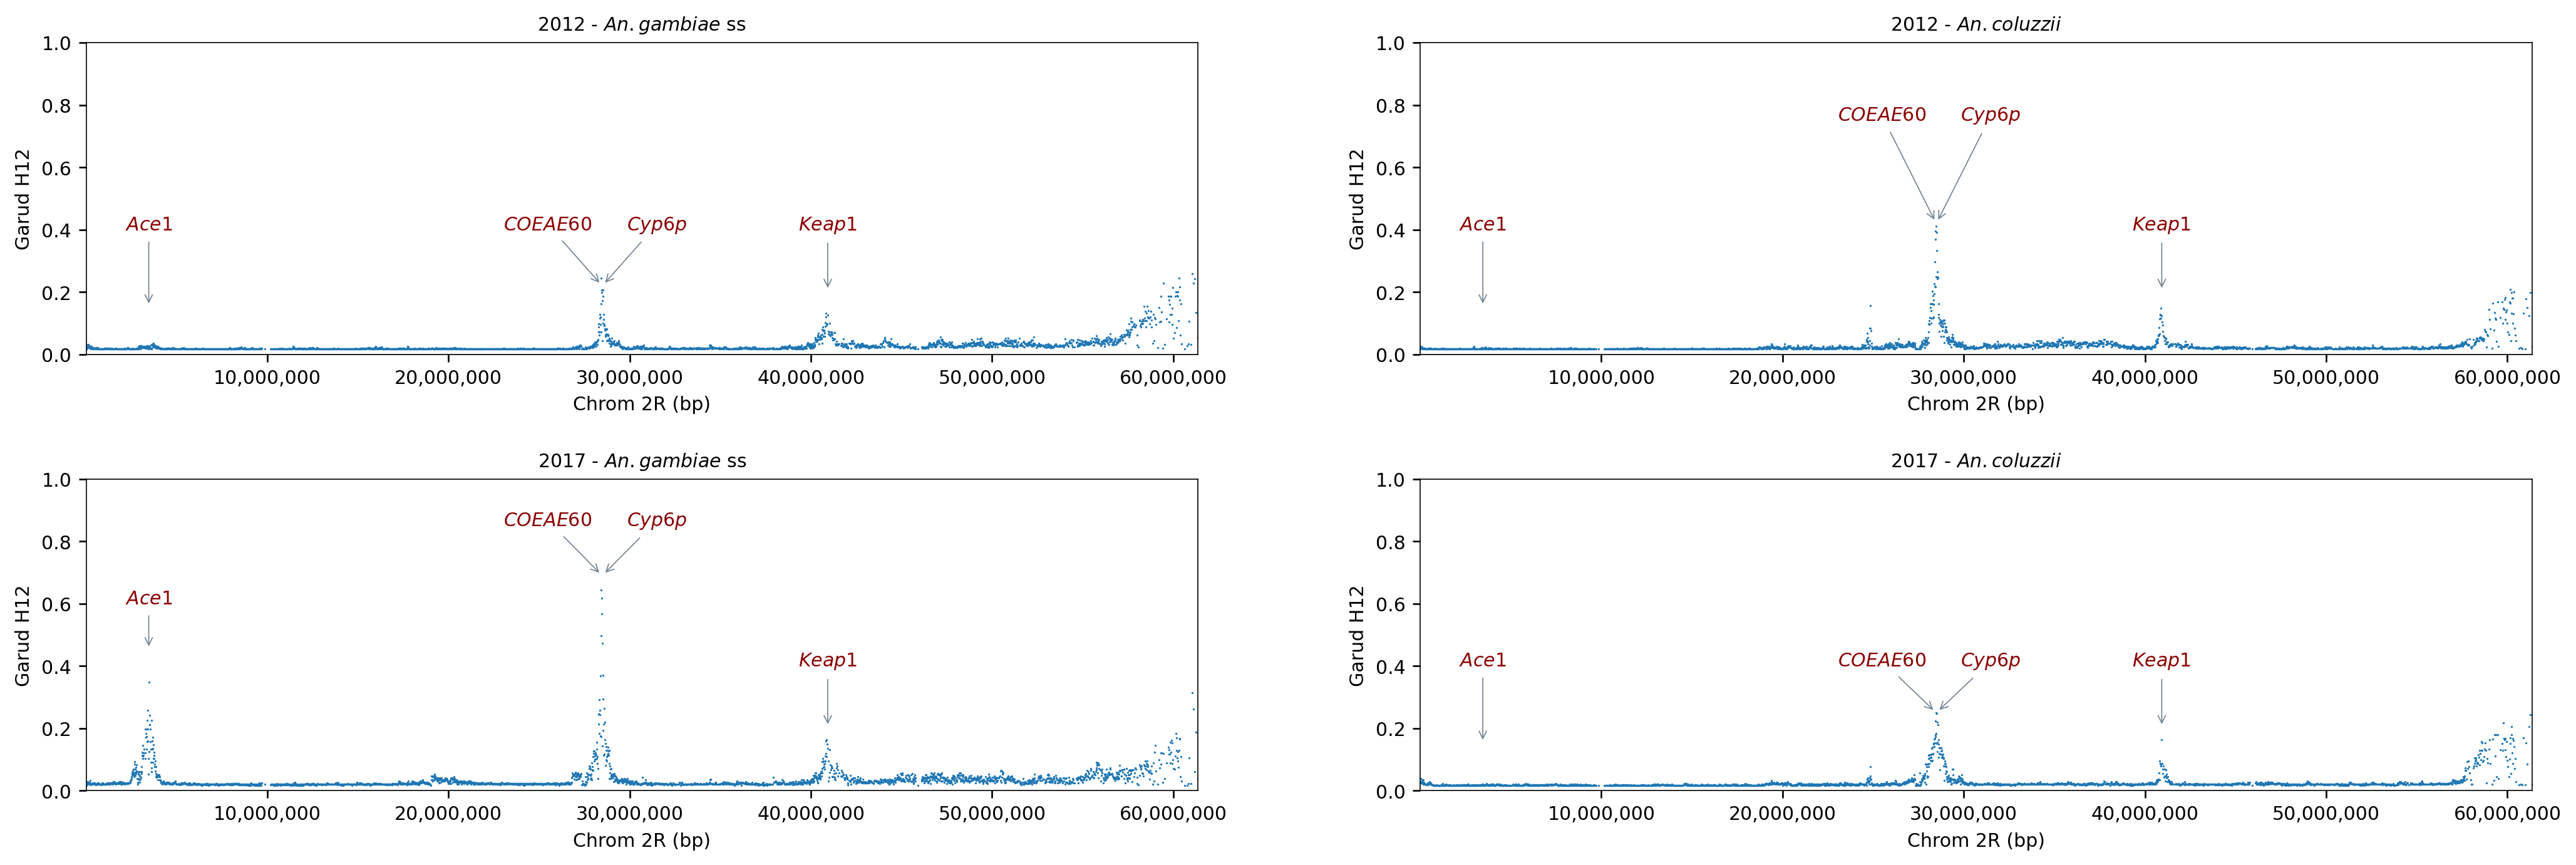

In [35]:
## Garud H12 plot in the chromosome 2
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax0, xlab='2R', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([28491242, 28493314]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.22), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax1 = plt.subplot(gs[1, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2017,ax=ax1, xlab='2R', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.45), xytext=(np.mean([3438301, 3497400]), 0.6), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.69), xytext=(np.mean([28491242, 28493314]), 0.85), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.69), xytext=(np.mean([31491242, 31493314]), 0.85), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.69), xytext=(np.mean([25485262, 25487080]), 0.85), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax2 = plt.subplot(gs[0, 1])
fig_h12(ydata_2R.pos, ydata_2R.coluzzii_2012, ax=ax2, xlab='2R', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.5), xytext=(np.mean([28491242, 28493314]), 0.75), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.42), xytext=(np.mean([31491242, 31493314]), 0.75), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([25485262, 25487080]), 0.75), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax3 = plt.subplot(gs[1, 1])
fig_h12(ydata_2R.pos, ydata_2R.coluzzii_2017,ax=ax3, xlab='2R', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([28491242, 28493314]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.25), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom2R_gh12.png", dpi=300, bbox_inches='tight')

<ipython-input-36-d2143d28219a>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax4 = plt.subplot(gs[0, 0])
<ipython-input-8-5e965acb56b2>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


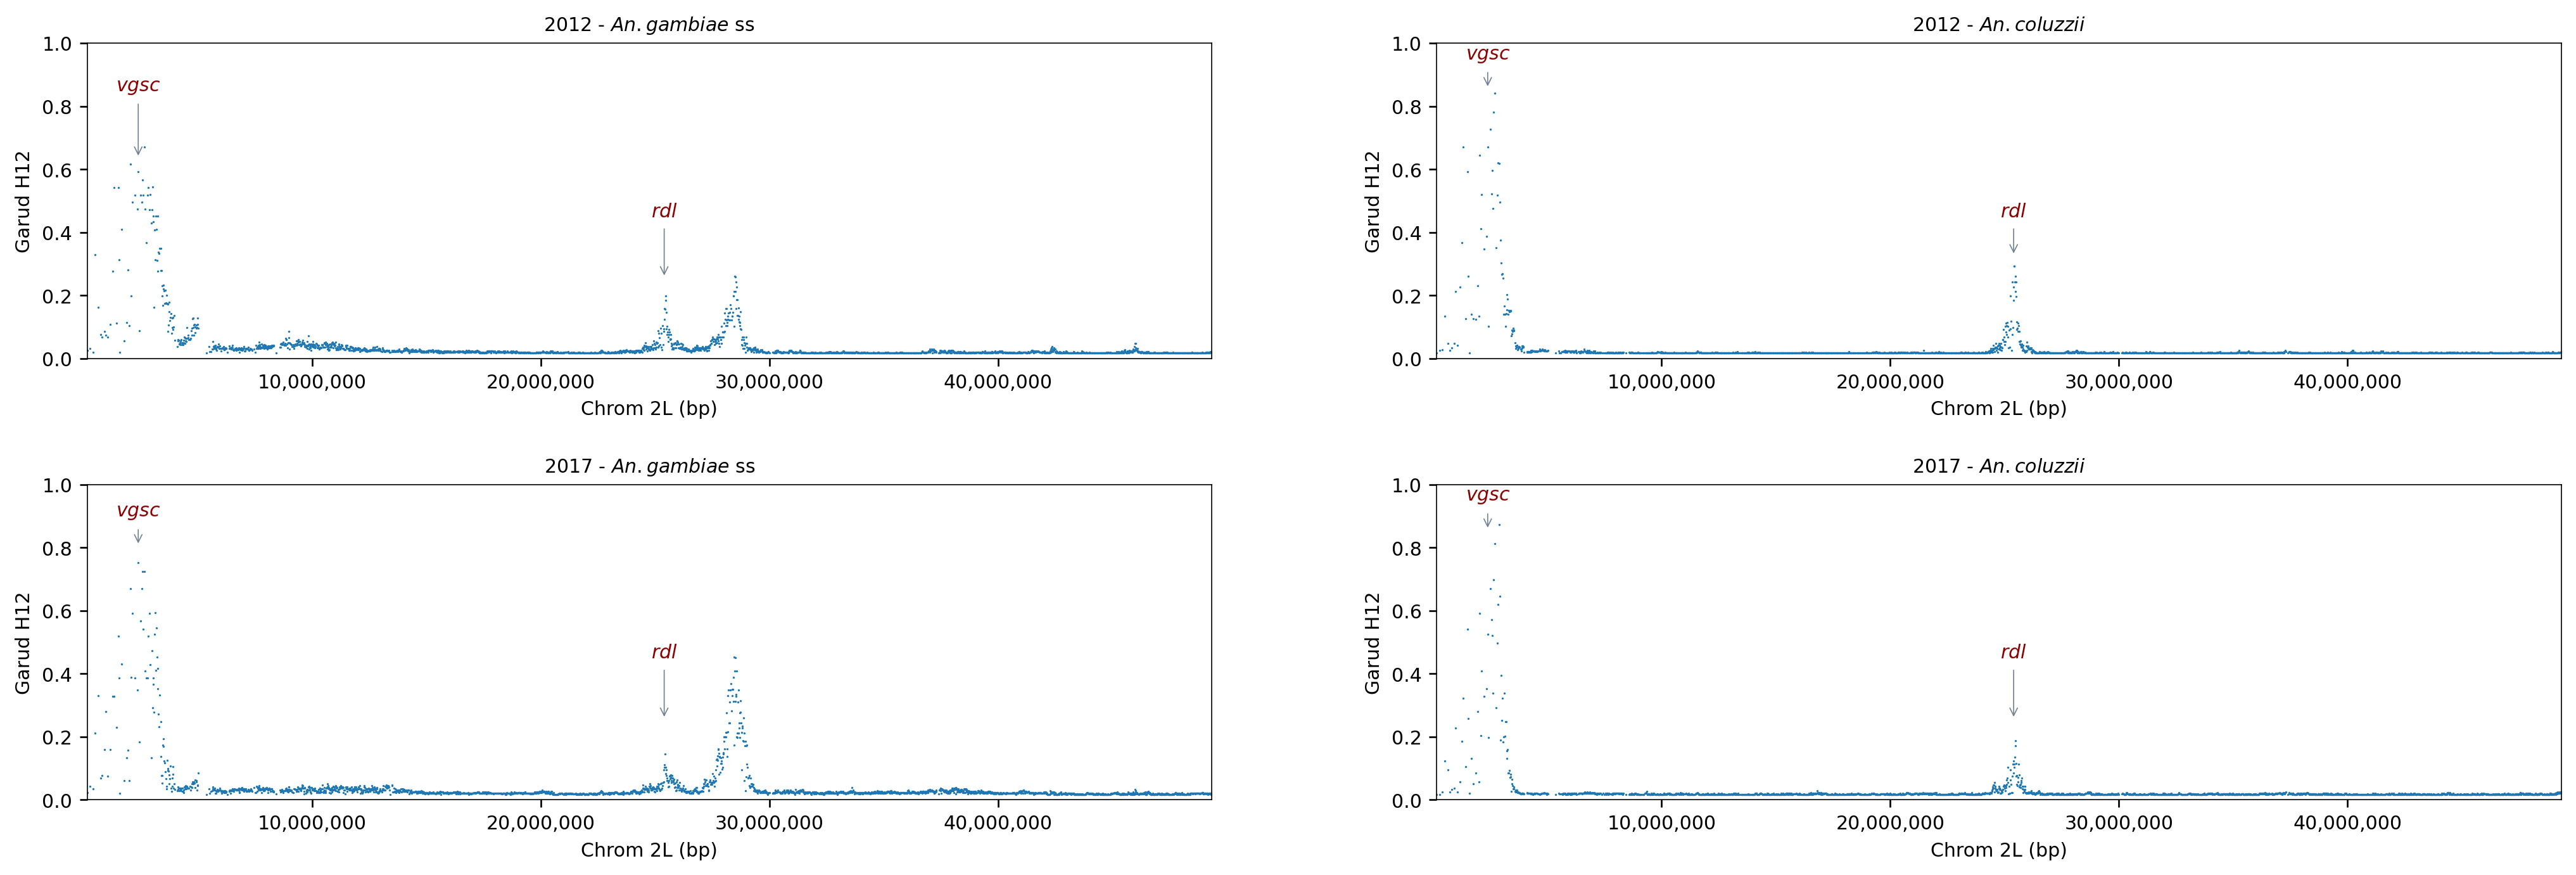

In [36]:
## Garud H12 plot in the chromosome 2
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax4 = plt.subplot(gs[0, 0])
fig_h12(ydata_2L.pos, ydata_2L.gambiae_2012, ax=ax4, xlab='2L', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.63), xytext=(np.mean([2358158, 2431617]), 0.85),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax5 = plt.subplot(gs[1, 0])
fig_h12(ydata_2L.pos, ydata_2L.gambiae_2017,ax=ax5, xlab='2L', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.80), xytext=(np.mean([2358158, 2431617]), 0.90),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax6 = plt.subplot(gs[0, 1])
fig_h12(ydata_2L.pos, ydata_2L.coluzzii_2012, ax=ax6, xlab='2L', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.85), xytext=(np.mean([2358158, 2431617]), 0.95),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.32), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax7 = plt.subplot(gs[1, 1])
fig_h12(ydata_2L.pos, ydata_2L.coluzzii_2017,ax=ax7, xlab='2L', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.85), xytext=(np.mean([2358158, 2431617]), 0.95),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom2L_gh12.png", dpi=300, bbox_inches='tight')

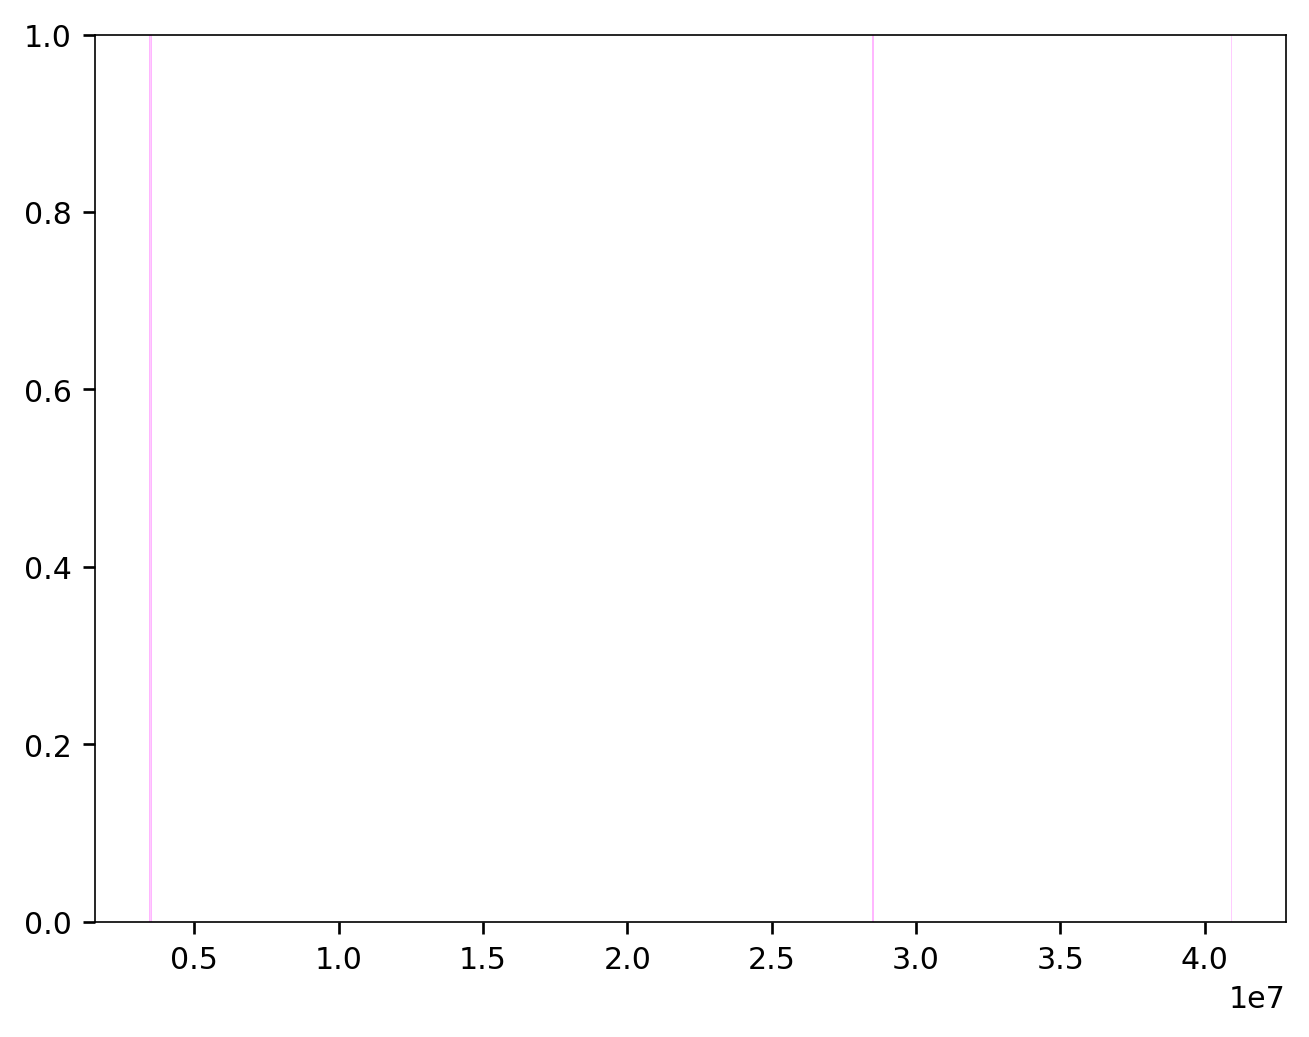

In [38]:
plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)

<ipython-input-37-a944f180ac6b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-8-5e965acb56b2>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


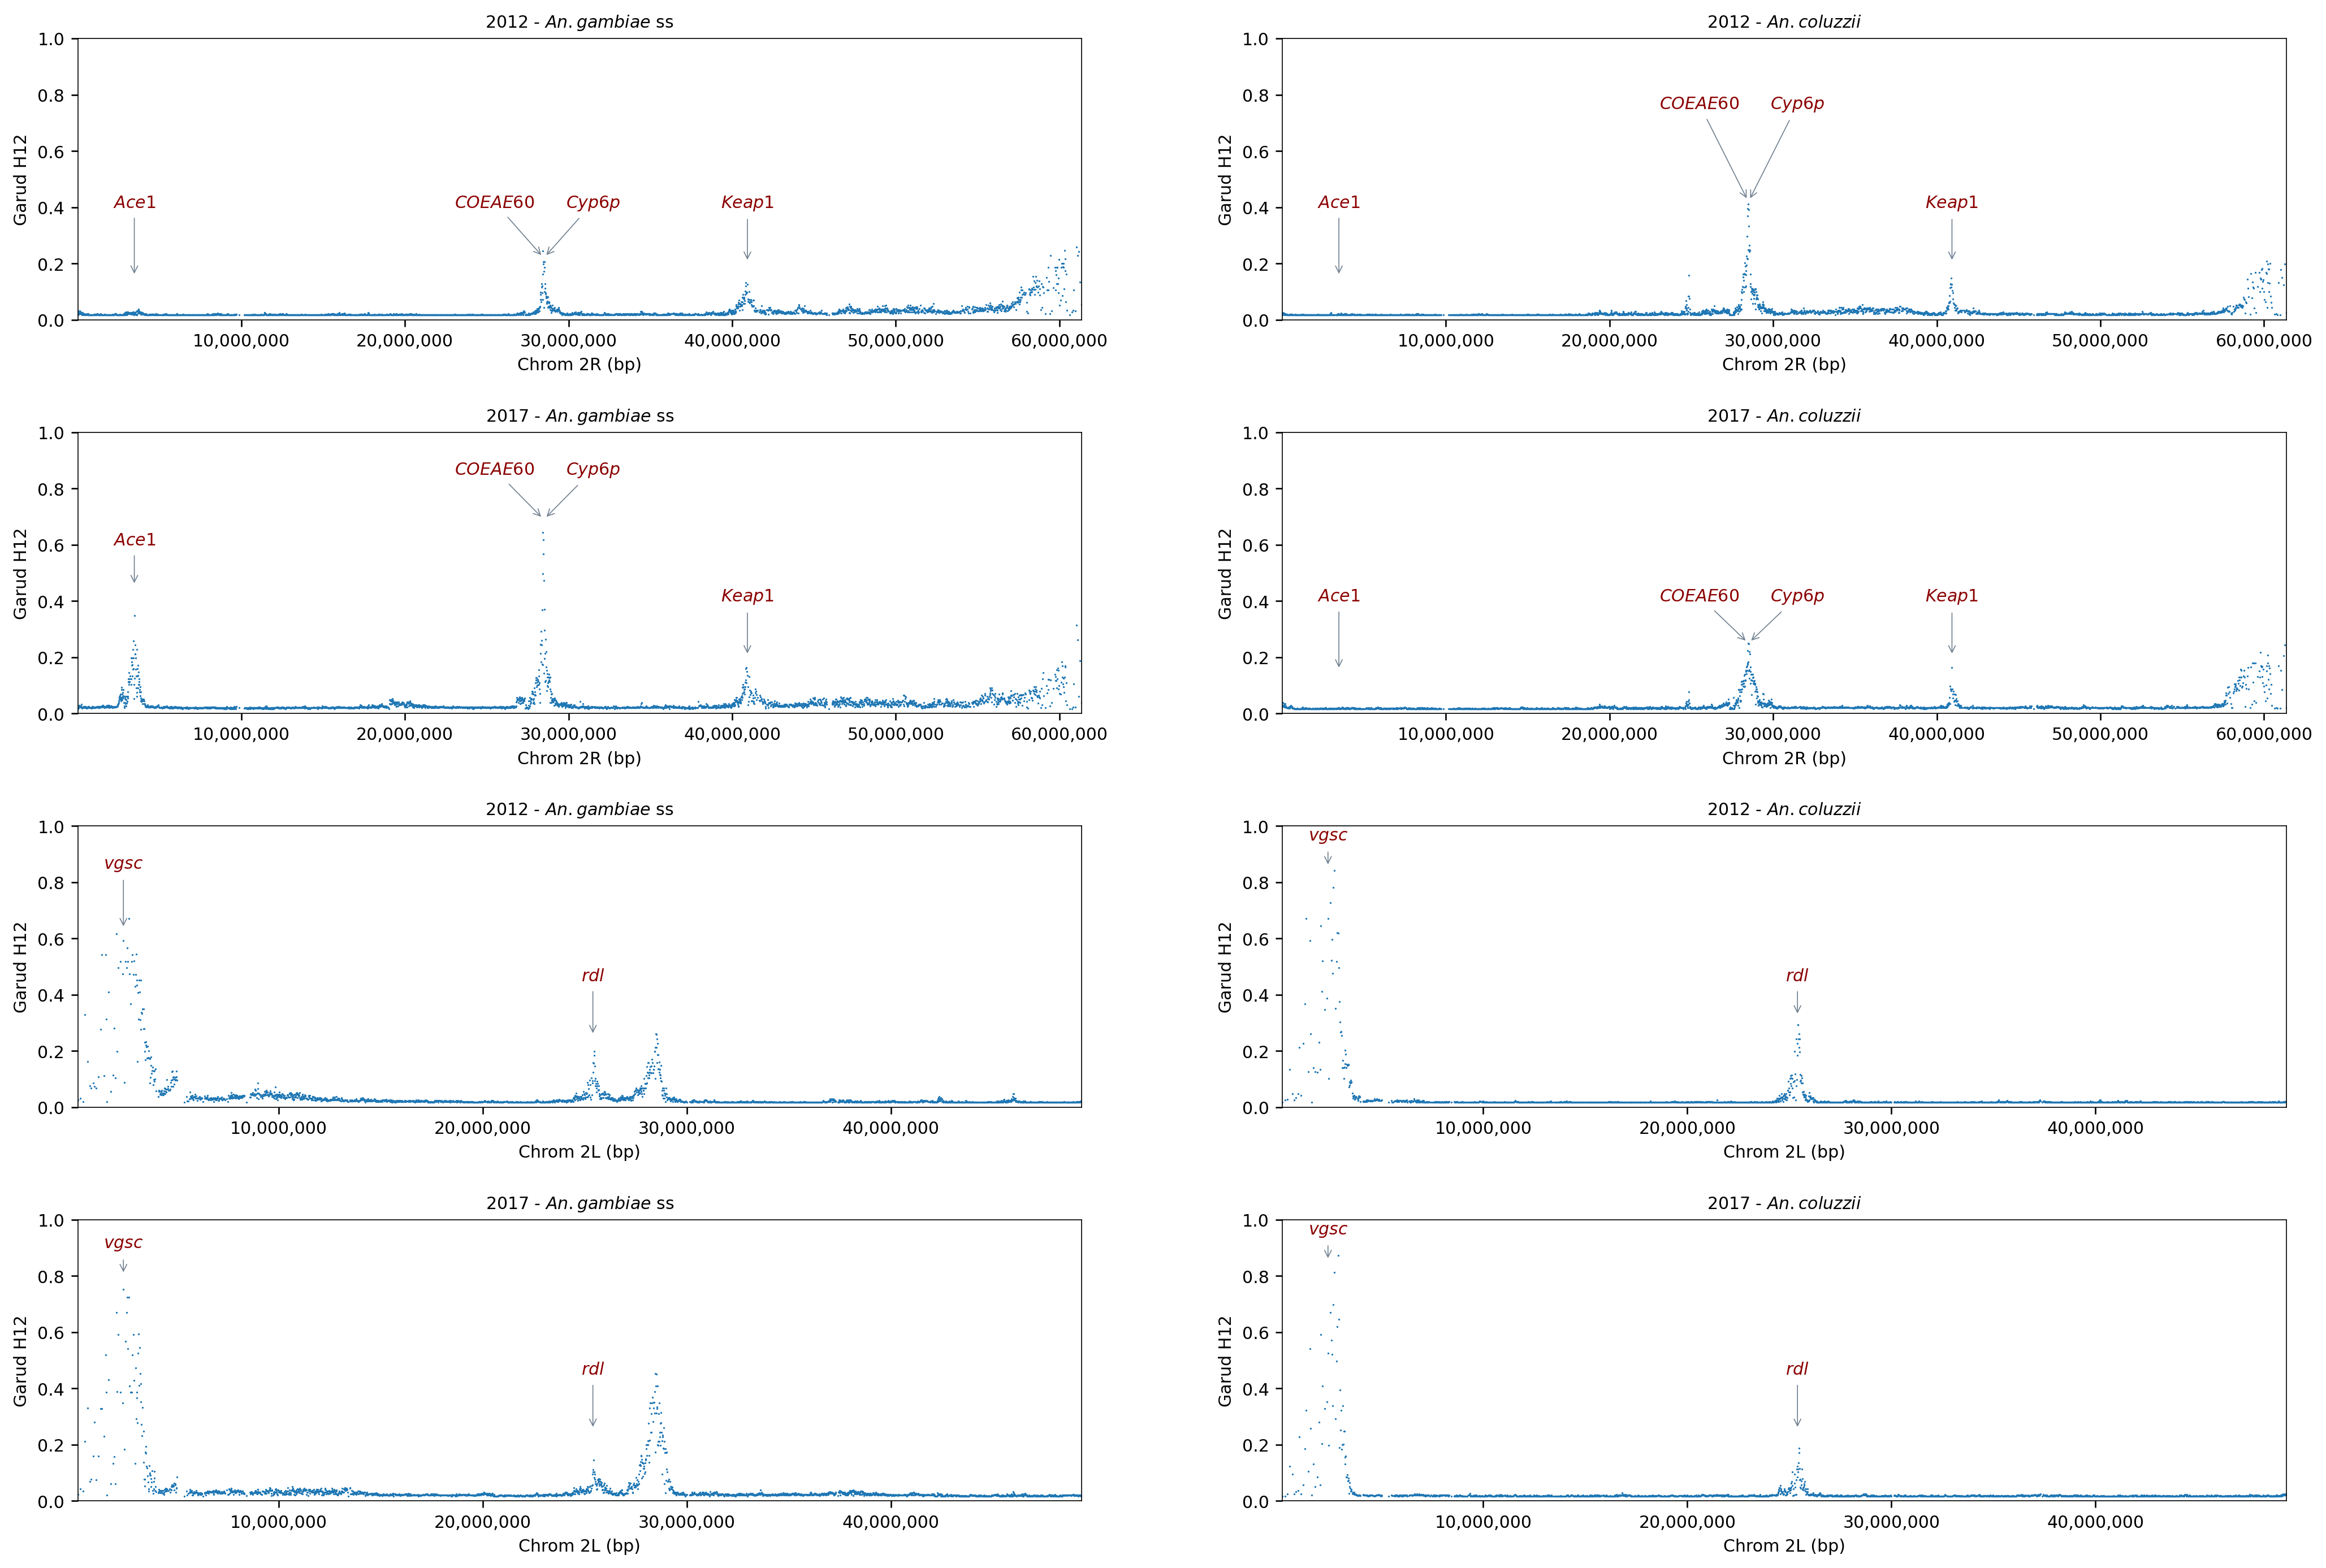

In [37]:
## Garud H12 plot in the chromosome 2
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax0, xlab='2R', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([28491242, 28493314]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.22), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax1 = plt.subplot(gs[1, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2017,ax=ax1, xlab='2R', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.45), xytext=(np.mean([3438301, 3497400]), 0.6), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.69), xytext=(np.mean([28491242, 28493314]), 0.85), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.69), xytext=(np.mean([31491242, 31493314]), 0.85), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.69), xytext=(np.mean([25485262, 25487080]), 0.85), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax2 = plt.subplot(gs[0, 1])
fig_h12(ydata_2R.pos, ydata_2R.coluzzii_2012, ax=ax2, xlab='2R', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.5), xytext=(np.mean([28491242, 28493314]), 0.75), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.42), xytext=(np.mean([31491242, 31493314]), 0.75), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([25485262, 25487080]), 0.75), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax3 = plt.subplot(gs[1, 1])
fig_h12(ydata_2R.pos, ydata_2R.coluzzii_2017,ax=ax3, xlab='2R', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([28491242, 28493314]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.25), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax4 = plt.subplot(gs[2, 0])
fig_h12(ydata_2L.pos, ydata_2L.gambiae_2012, ax=ax4, xlab='2L', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.63), xytext=(np.mean([2358158, 2431617]), 0.85),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax5 = plt.subplot(gs[3, 0])
fig_h12(ydata_2L.pos, ydata_2L.gambiae_2017,ax=ax5, xlab='2L', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.80), xytext=(np.mean([2358158, 2431617]), 0.90),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax6 = plt.subplot(gs[2, 1])
fig_h12(ydata_2L.pos, ydata_2L.coluzzii_2012, ax=ax6, xlab='2L', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.85), xytext=(np.mean([2358158, 2431617]), 0.95),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.32), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax7 = plt.subplot(gs[3, 1])
fig_h12(ydata_2L.pos, ydata_2L.coluzzii_2017,ax=ax7, xlab='2L', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.85), xytext=(np.mean([2358158, 2431617]), 0.95),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom2_gh12.png", dpi=300, bbox_inches='tight')

<ipython-input-39-9edecb5a3e58>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-8-5e965acb56b2>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


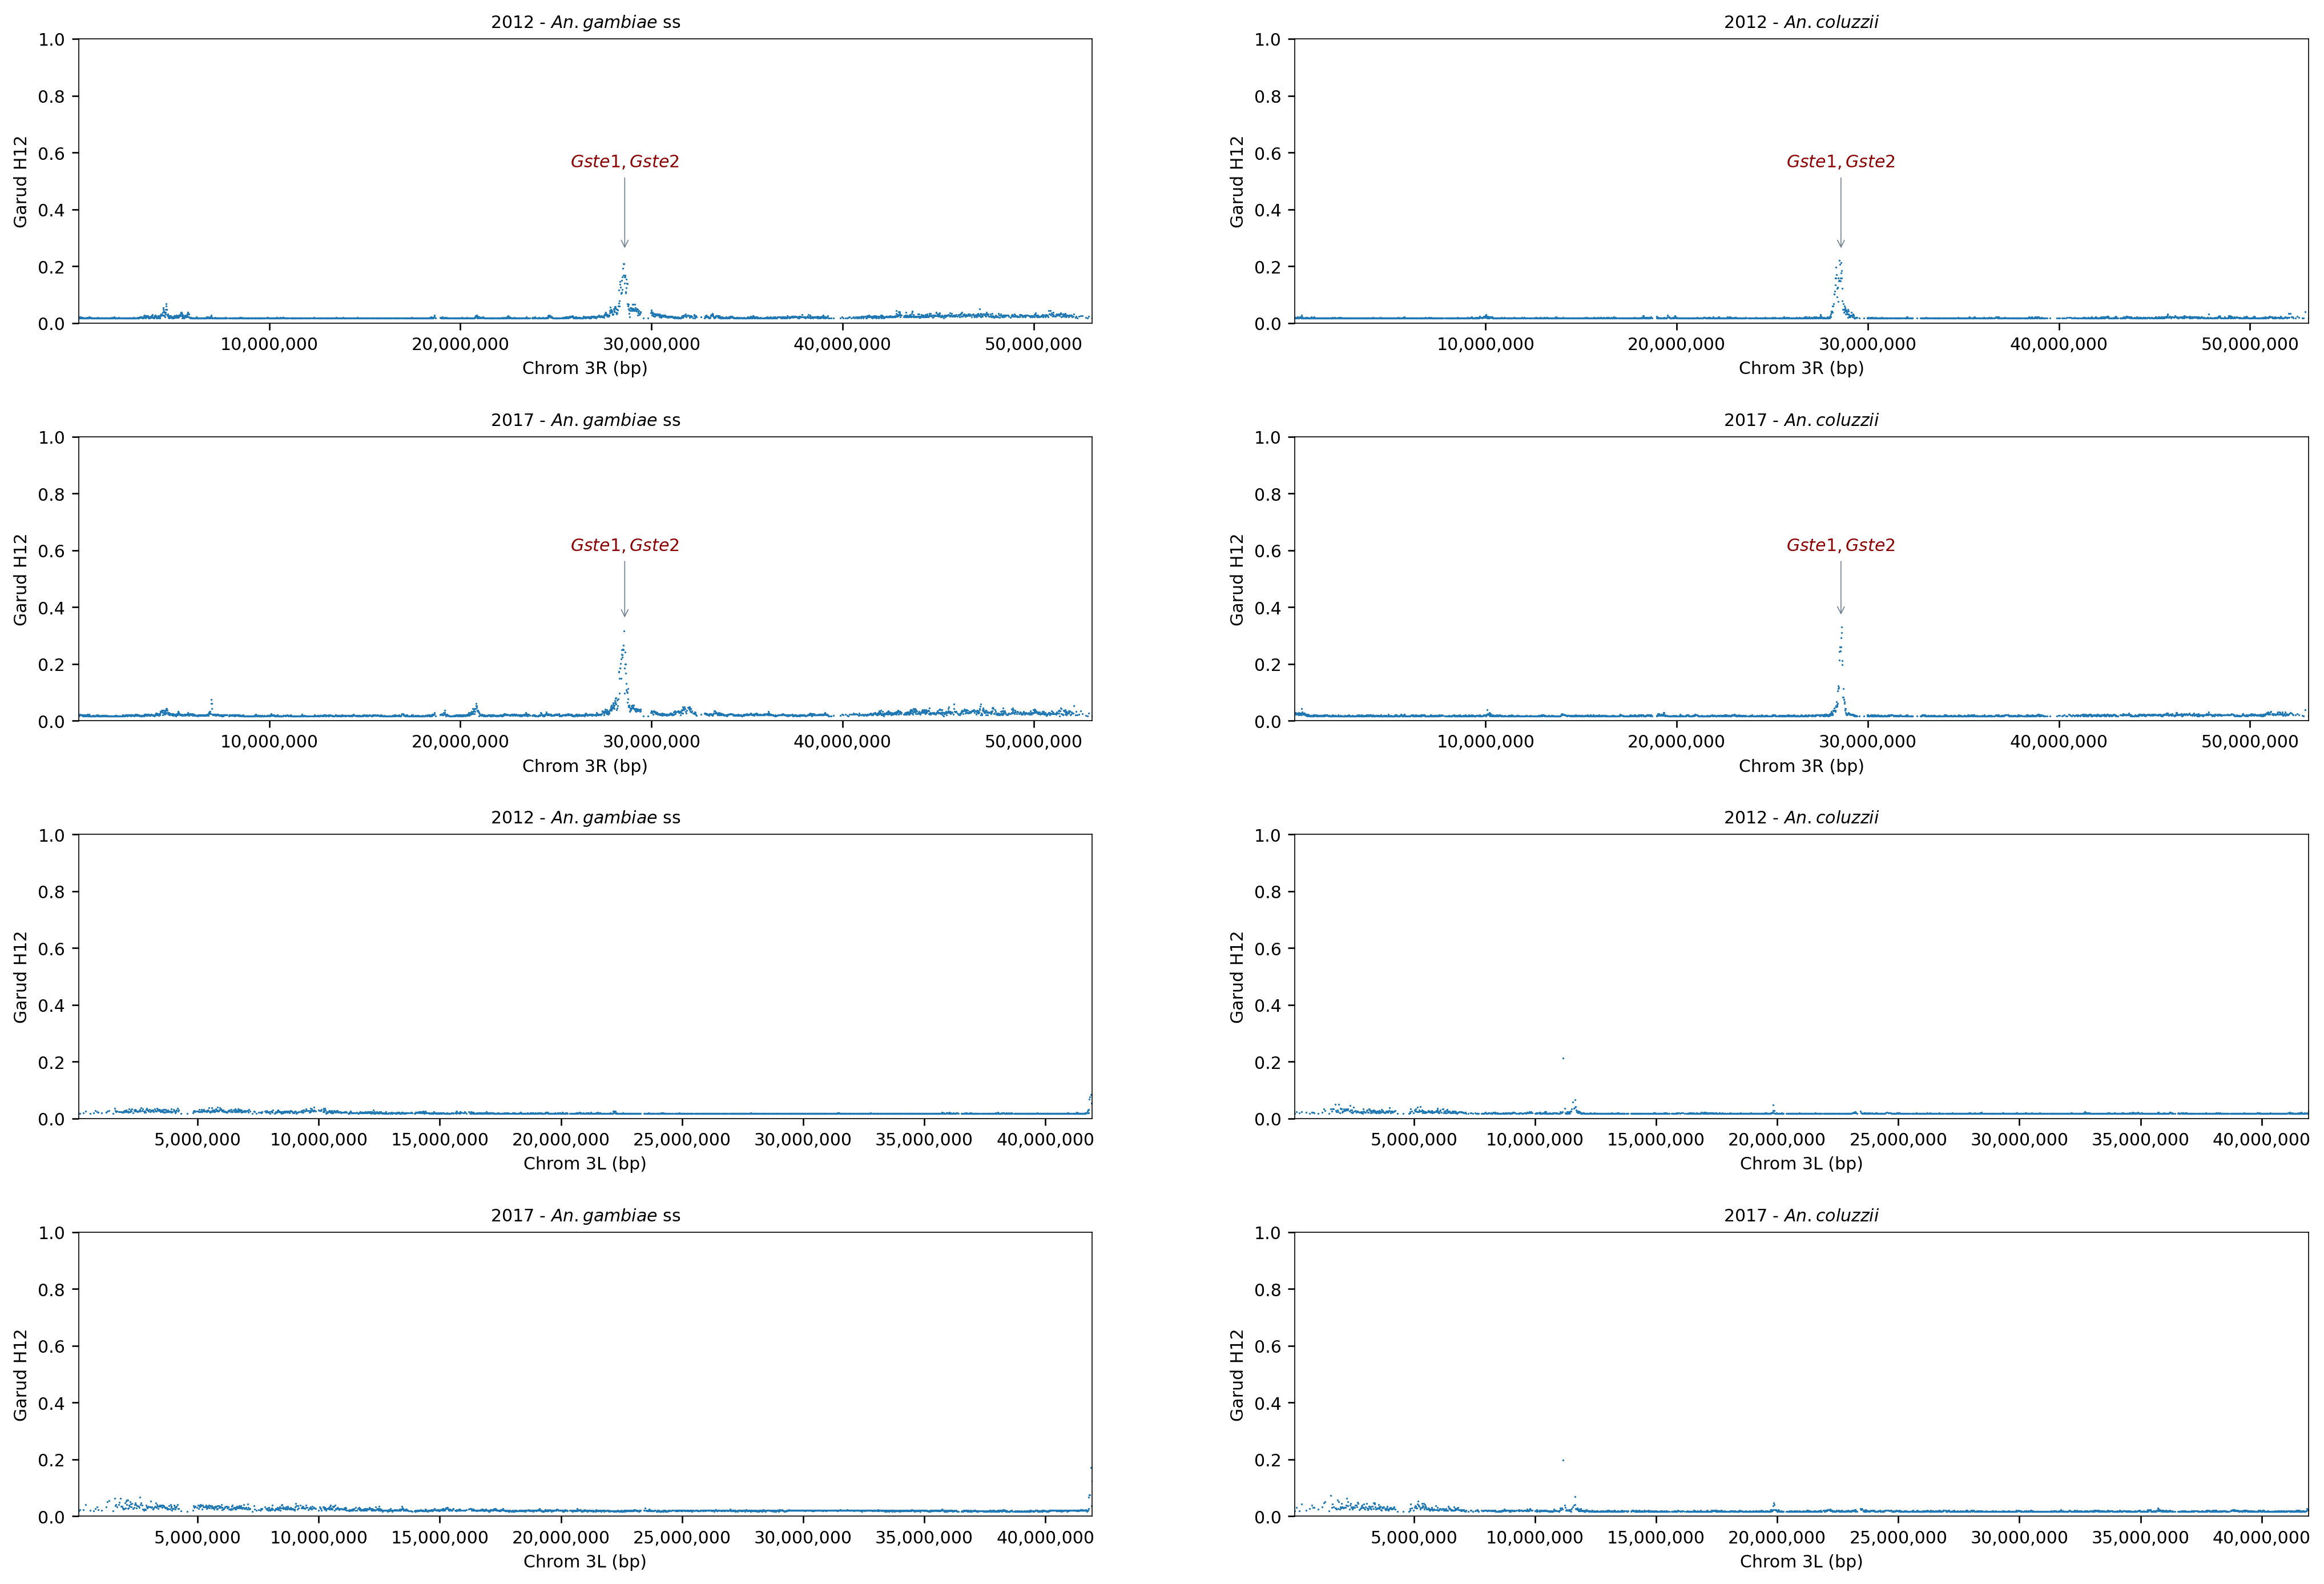

In [39]:
## Garud H12 plot in the chromosome 3
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_3R.pos, ydata_3R.gambiae_2012, ax=ax0, xlab='3R', ylab=True, title='2012 - $An. gambiae$ ss')
#plt.axvspan(28597652, 28599816, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.25), xytext=(np.mean([28597652, 28599816]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax1 = plt.subplot(gs[1, 0])
fig_h12(ydata_3R.pos, ydata_3R.gambiae_2017,ax=ax1, xlab='3R', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(28597652, 28599816, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.35), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax2 = plt.subplot(gs[0, 1])
fig_h12(ydata_3R.pos, ydata_3R.coluzzii_2012, ax=ax2, xlab='3R', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(28597652, 28599816, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.25), xytext=(np.mean([28597652, 28599816]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax3 = plt.subplot(gs[1, 1])
fig_h12(ydata_3R.pos, ydata_3R.coluzzii_2017, ax=ax3, xlab='3R', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(28597652, 28599816, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax4 = plt.subplot(gs[2, 0])
fig_h12(ydata_3L.pos, ydata_3L.gambiae_2012, ax=ax4, xlab='3L', ylab=True, title='2012 - $An. gambiae$ ss')

ax5 = plt.subplot(gs[3, 0])
fig_h12(ydata_3L.pos, ydata_3L.gambiae_2017,ax=ax5, xlab='3L', ylab=True, title='2017 - $An. gambiae$ ss')

ax6 = plt.subplot(gs[2, 1])
fig_h12(ydata_3L.pos, ydata_3L.coluzzii_2012, ax=ax6, xlab='3L', ylab=True, title='2012 - $An. coluzzii$')

ax7 = plt.subplot(gs[3, 1])
fig_h12(ydata_3L.pos, ydata_3L.coluzzii_2017,ax=ax7, xlab='3L', ylab=True, title='2017 - $An. coluzzii$')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom3_gh12.png", dpi=300, bbox_inches='tight')

<ipython-input-40-18418132be82>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-8-5e965acb56b2>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


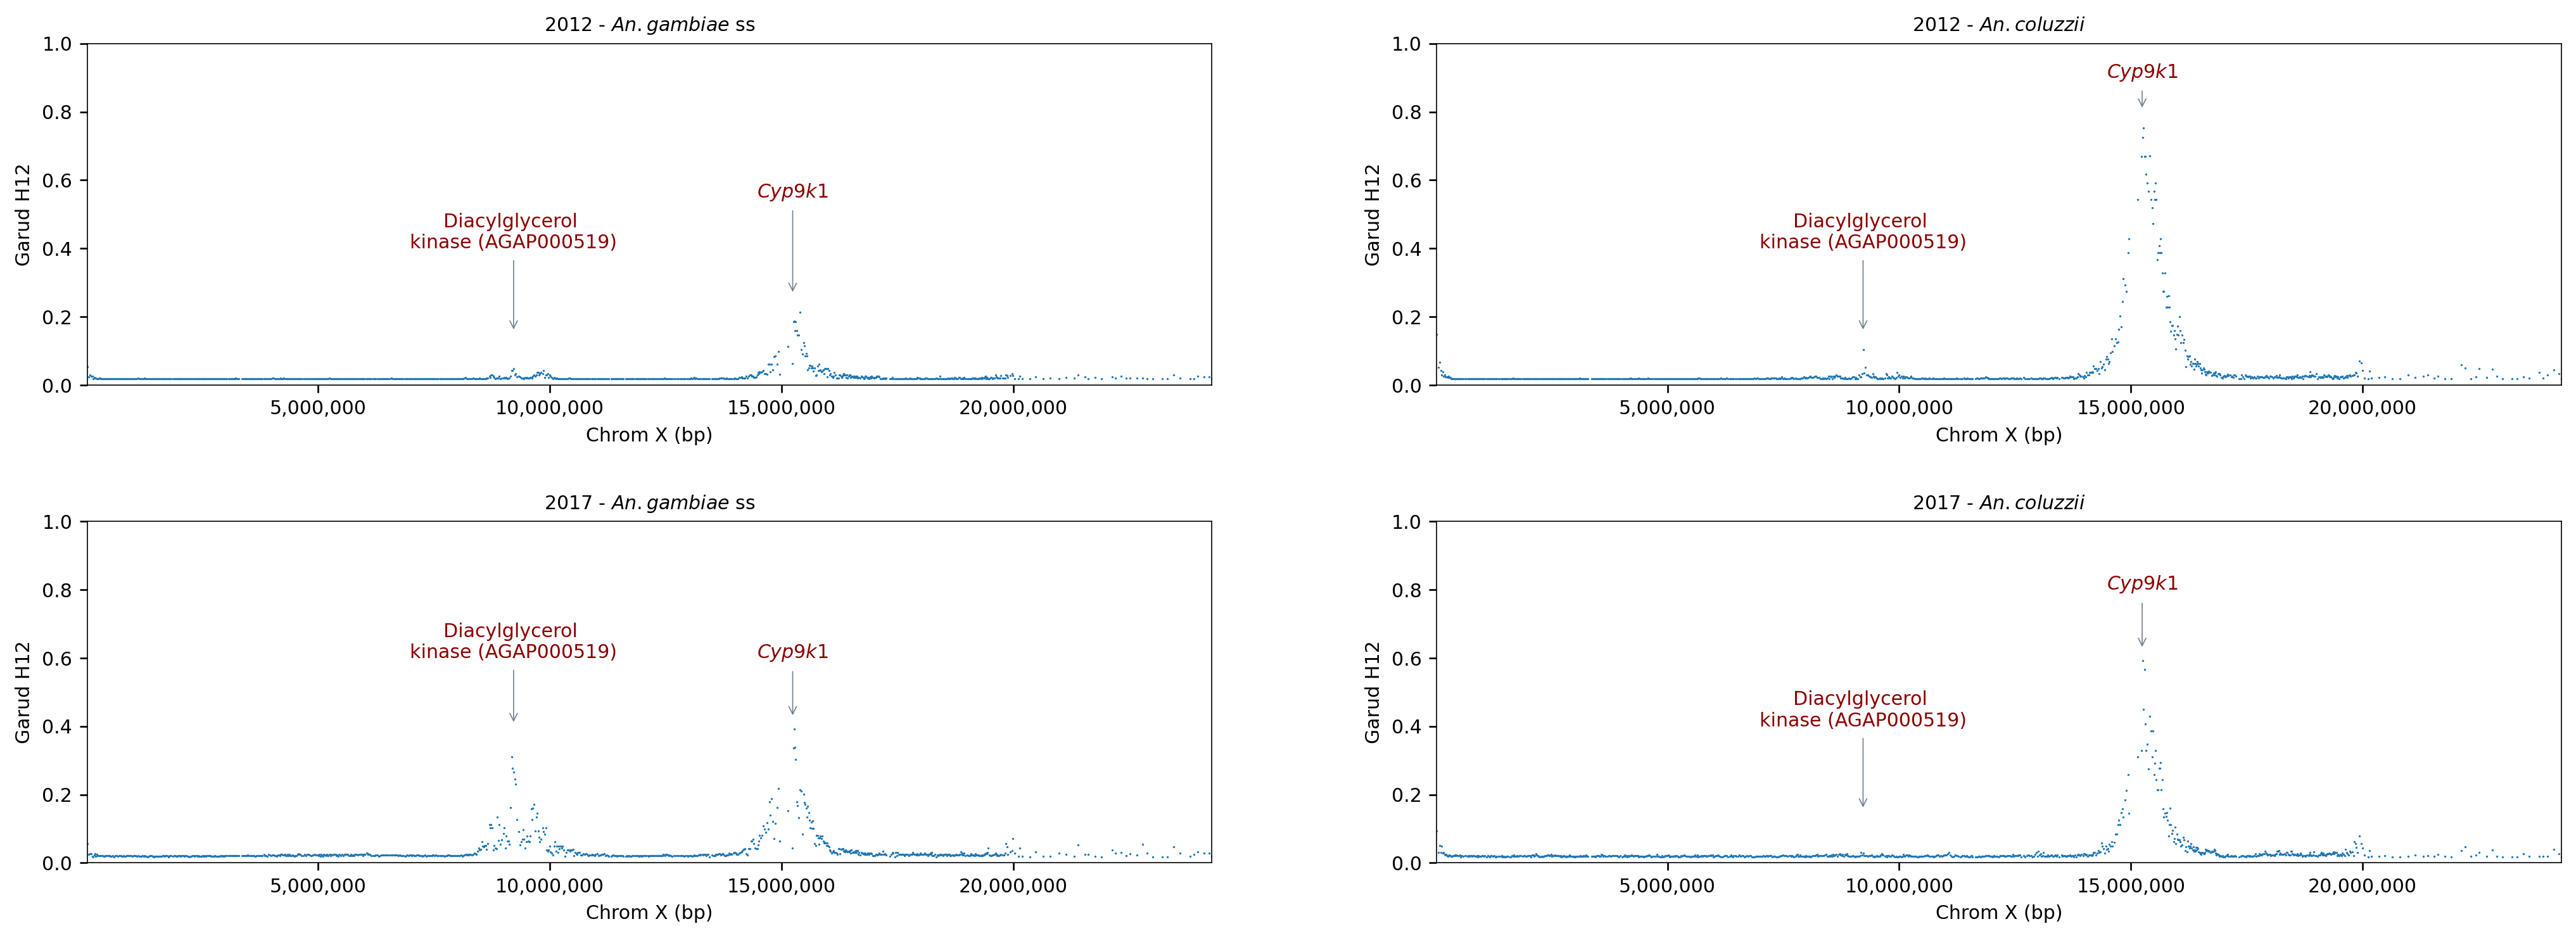

In [40]:
## Garud H12 plot in the chromosome X
fig, ax = plt.subplots(figsize=(21,7))
gs = GridSpec(2, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_X.pos, ydata_X.gambiae_2012, ax=ax0, xlab='X', ylab=True, title='2012 - $An. gambiae$ ss')
#plt.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
#plt.annotate('$Fru$', xy=(np.mean([1283016, 1373662]), 0.15), xytext=(np.mean([1283016, 1373662]), 0.35), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(9200001,9240000, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('Diacylglycerol \nkinase (AGAP000519)', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.26), xytext=(np.mean([15240572, 15242864]), 0.55), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax1 = plt.subplot(gs[1, 0])
fig_h12(ydata_X.pos, ydata_X.gambiae_2017,ax=ax1, xlab='X', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
#plt.annotate('$Fru$', xy=(np.mean([1283016, 1373662]), 0.15), xytext=(np.mean([1283016, 1373662]), 0.35), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(9200001,9240000, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('Diacylglycerol \nkinase (AGAP000519)', xy=(np.mean([9200001,9240000]), 0.40), xytext=(np.mean([9200001,9240000]), 0.6), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.42), xytext=(np.mean([15240572, 15242864]), 0.6), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax2 = plt.subplot(gs[0, 1])
fig_h12(ydata_X.pos, ydata_X.coluzzii_2012, ax=ax2, xlab='X', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
#plt.annotate('$Fru$', xy=(np.mean([1283016, 1373662]), 0.15), xytext=(np.mean([1283016, 1373662]), 0.35), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(9200001,9240000, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('Diacylglycerol \nkinase (AGAP000519)', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.8), xytext=(np.mean([15240572, 15242864]), 0.9), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax3 = plt.subplot(gs[1, 1])
fig_h12(ydata_X.pos, ydata_X.coluzzii_2017, ax=ax3, xlab='X', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
#plt.annotate('$Fru$', xy=(np.mean([1283016, 1373662]), 0.15), xytext=(np.mean([1283016, 1373662]), 0.35), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(9200001,9240000, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('Diacylglycerol \nkinase (AGAP000519)', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.62), xytext=(np.mean([15240572, 15242864]), 0.8), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chromX_gh12.png", dpi=300, bbox_inches='tight')

<ipython-input-41-d73d332e2e0f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-8-5e965acb56b2>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


Text(15241718.0, 0.55, '$Cyp9k1$')

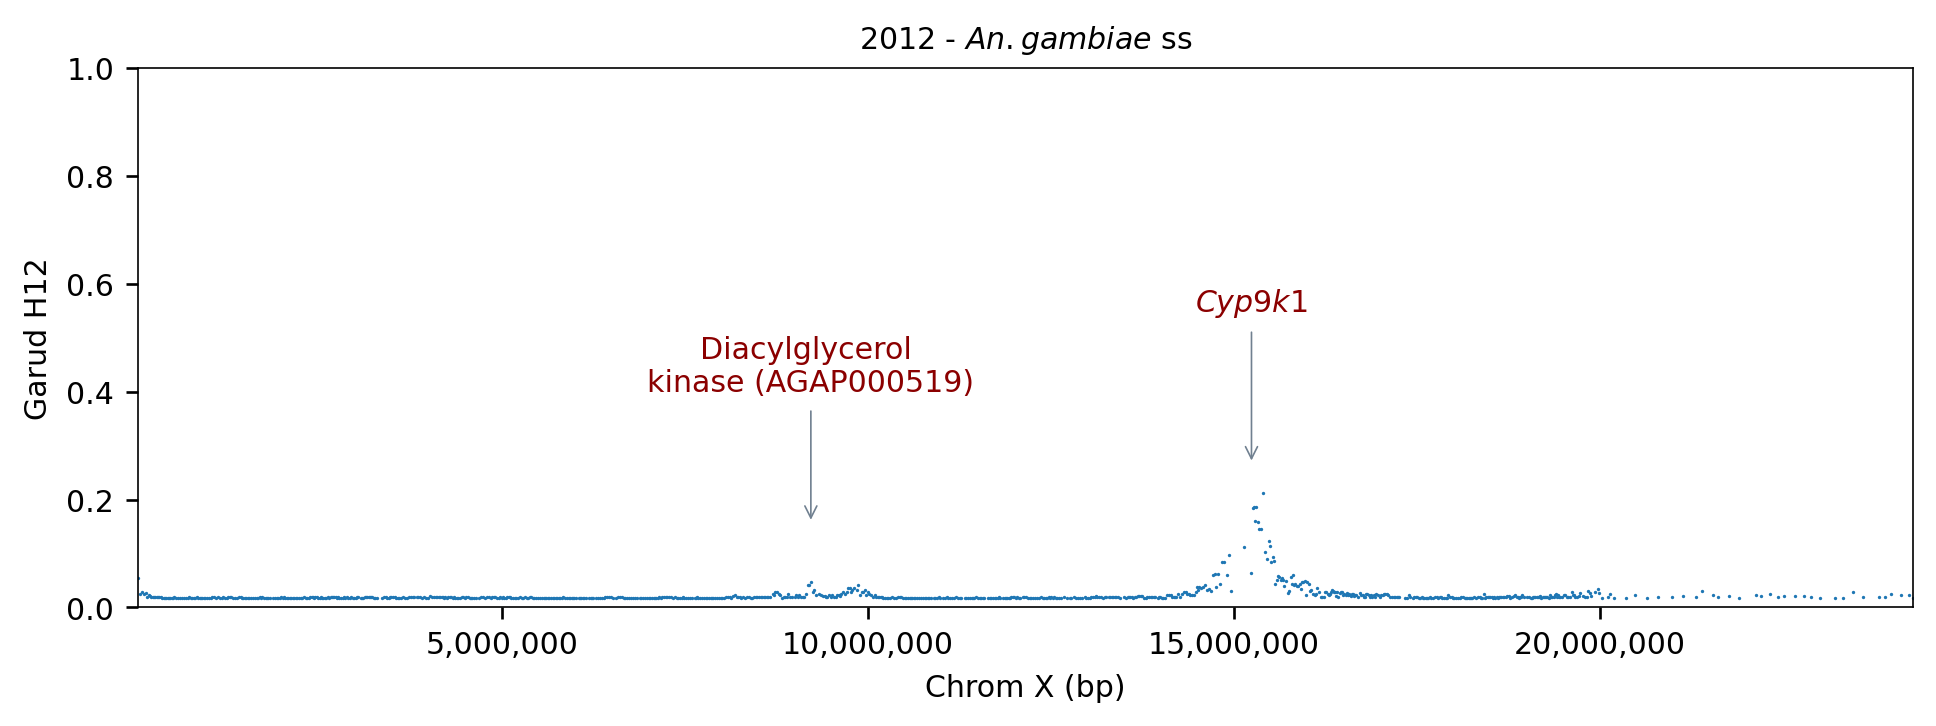

In [41]:
pos = list(ydata_X.pos)
## Garud H12 plot in the chromosome X
fig, ax = plt.subplots(figsize=(21,7))
gs = GridSpec(2, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_X.pos, ydata_X.gambiae_2012, ax=ax0, xlab='X', ylab=True, title='2012 - $An. gambiae$ ss')
#plt.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
#plt.annotate('$Fru$', xy=(np.mean([1283016, 1373662]), 0.15), xytext=(np.mean([1283016, 1373662]), 0.35), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(9200001,9240000, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('Diacylglycerol \nkinase (AGAP000519)', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.26), xytext=(np.mean([15240572, 15242864]), 0.55), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')


In [42]:
# Compute the figure of sequence divergence
def fig_h121(x, y, title=None,  ax=None, color=None, ylab=None, xlab=None, fig_name=None):
  #define ax
  if ax is None:
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.despine(ax=ax, offset=5)

  # make plot
  ax.plot(x, y, linestyle=' ', marker='o', color=color, ms=0.5)
  # Plot title
  if title:
    ax.set_title(f'{title}')

  # Customize plot
  if ylab:
    ax.set_ylabel('H12')
  if xlab:
    ax.set_xlabel(f'Chrom {xlab} (bp)')

  #ax setting
  ax.set_ylim(0,1)
  xlim=(list(x)[0], list(x)[-1])
  ax.set_xlim(*xlim)
  ax.set_xticks([])
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


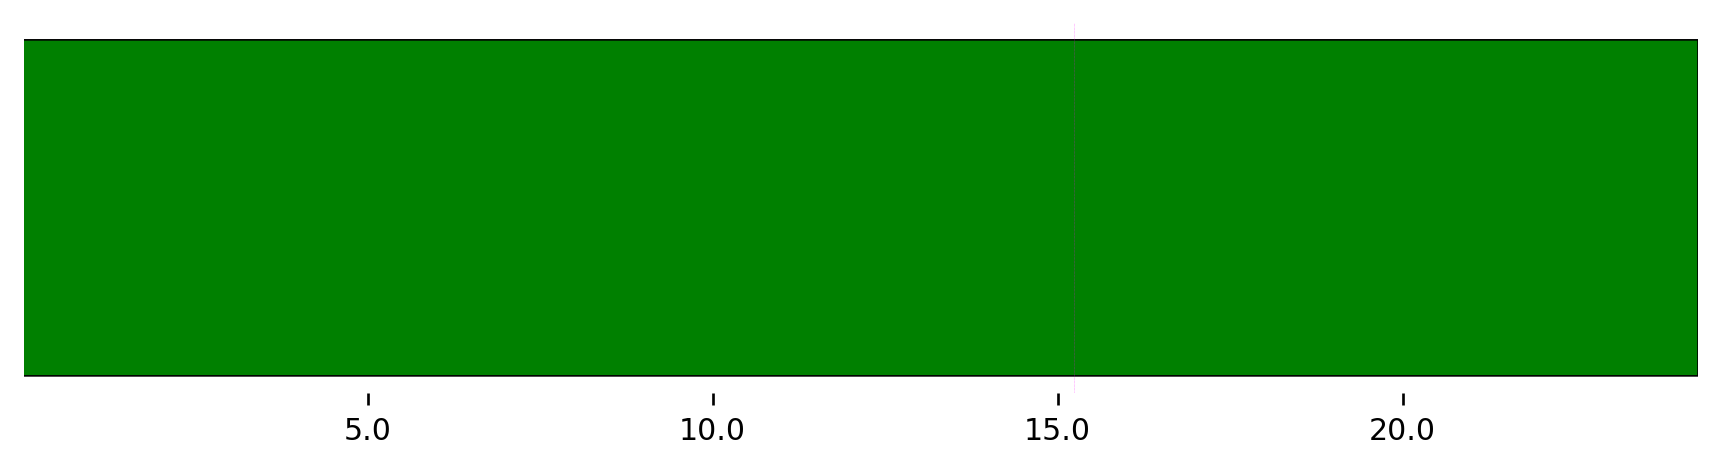

In [43]:
def fig_seq (xlim1=pos, xy=(0,0), wh=(pos[-1],0.05),boxstyle=("Round, pad=0.1"),
             facecolor="green", edgecolor=None,ax=None, xlab=None):
  if ax is None:
    fig, ax = plt.subplots(figsize=(9, 2))
  sns.despine(ax=ax, left=True, bottom=True)
  patch = mpl.patches.FancyBboxPatch((xy[0],xy[1]),wh[0],wh[1], boxstyle=boxstyle,
                                     facecolor=facecolor, edgecolor=edgecolor)
  ax.add_patch(patch)
  if xlab:
    ax.set_xlabel(f'{xlab}')

  if xlim1:
    xlim=(list(xlim1)[0], list(xlim1)[-1])
    ax.set_xlim(*xlim)
    ax.set_yticks([])
    ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])
    ax.autoscale(axis='y', tight=False)
fig_seq()
plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, ls='--', lw=0.2)

<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


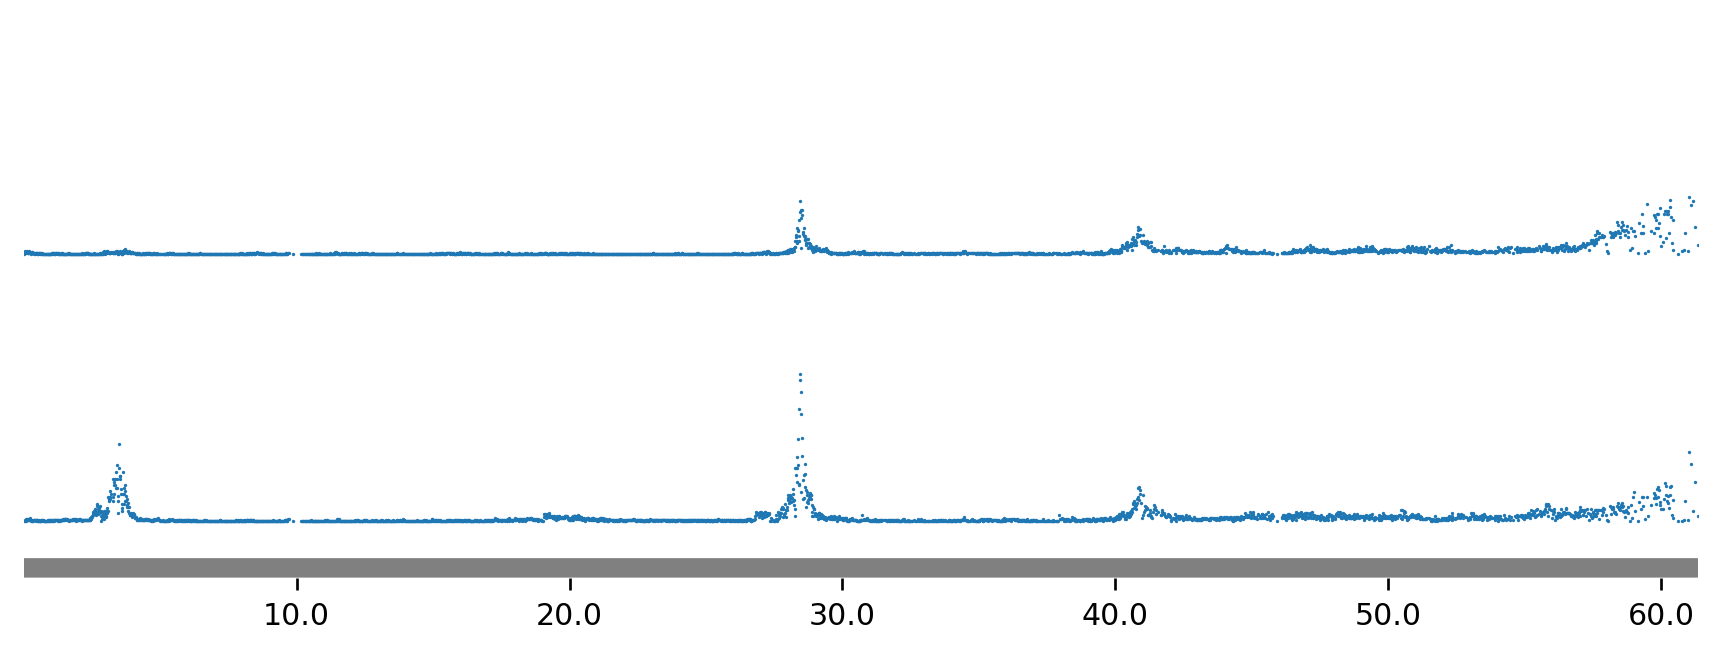

In [44]:
pos_2R = list(ydata_2R.pos)
gs = plt.GridSpec(nrows=3, ncols=1, height_ratios=(6,6,0.5))
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(gs[0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax, ylab=True)
plt.axis('off')
ax = fig.add_subplot(gs[1])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2017, ax=ax, ylab=True)
plt.axis('off')
ax = fig.add_subplot(gs[2])
fig_seq(xlim1=pos_2R,wh=(pos_2R[-1],0.05),boxstyle=("Round, pad=0.1"),ax=ax,facecolor='gray', edgecolor='gray')

<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


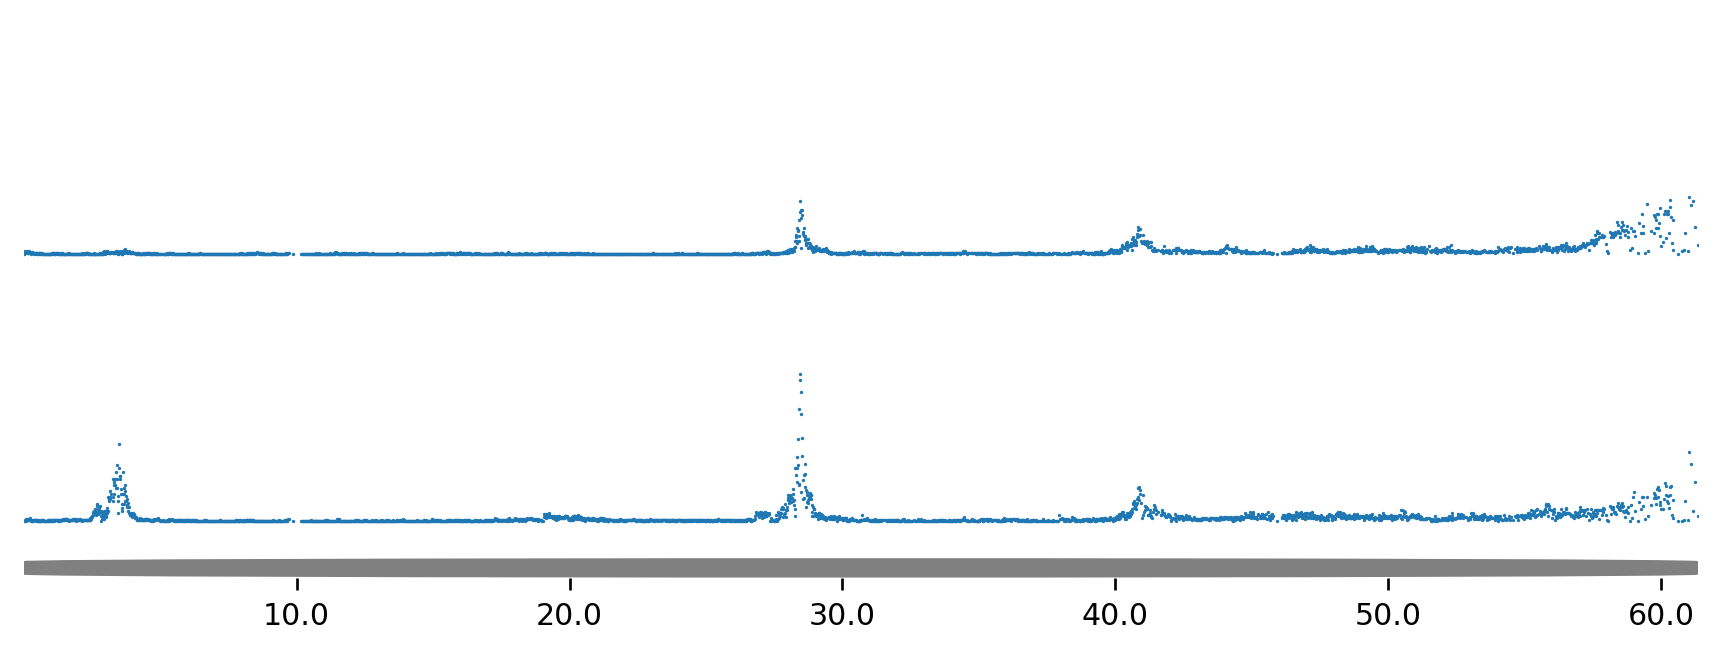

In [45]:


gs = plt.GridSpec(nrows=3, ncols=1, height_ratios=(6,6,0.5))
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(gs[0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax, ylab=True)
plt.axis('off')
ax = fig.add_subplot(gs[1])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2017, ax=ax, ylab=True)
plt.axis('off')
ax = fig.add_subplot(gs[2])
fig_seq(xlim1=pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax,facecolor='gray', edgecolor='gray')


<ipython-input-46-f8a80cf6d893>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0,0])
<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


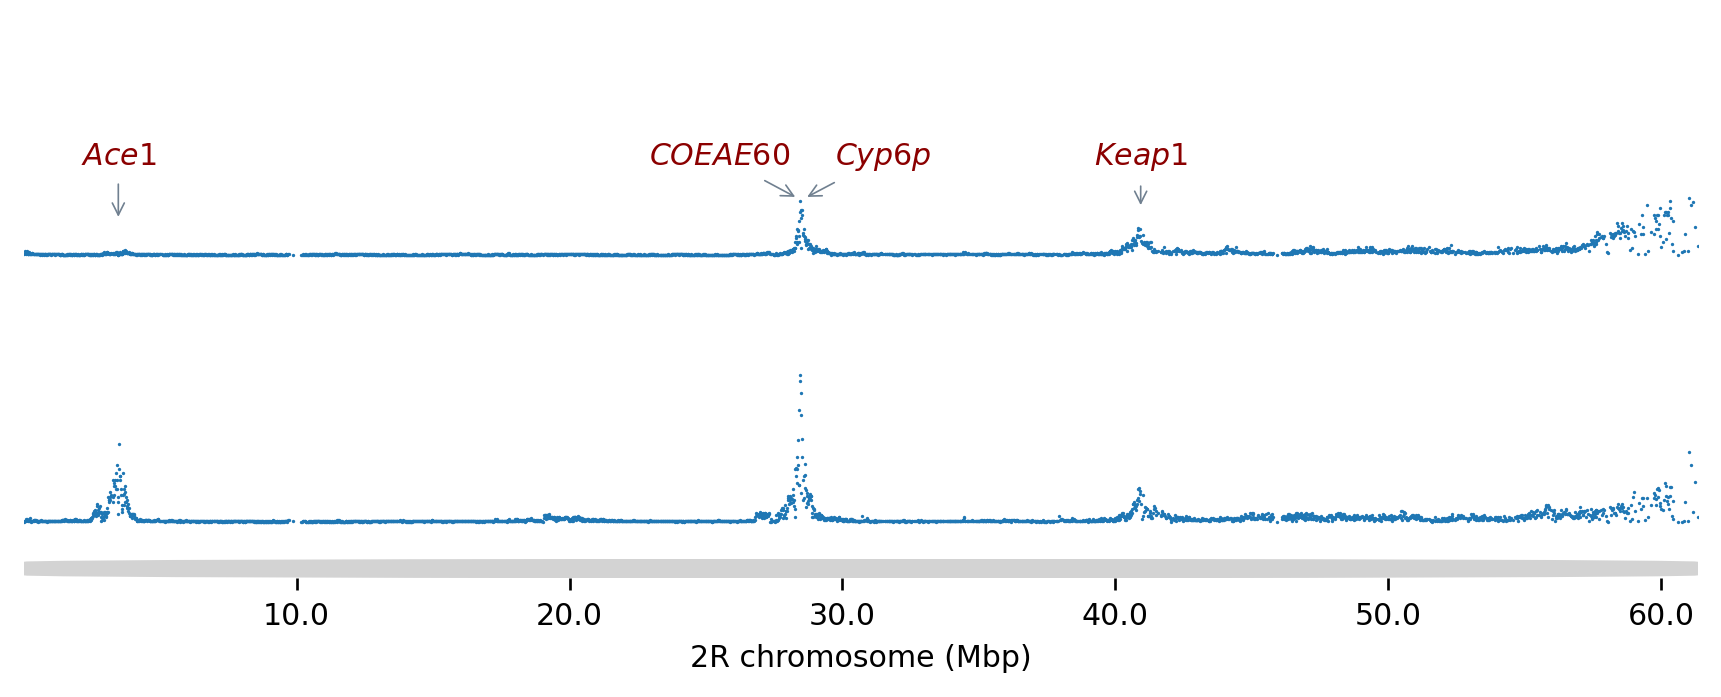

In [46]:
gs = plt.GridSpec(nrows=3, ncols=1, height_ratios=(6,6,0.5))
fig, ax  = plt.subplots(figsize=(9,3))
ax0 = plt.subplot(gs[0,0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax0, ylab=True)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.25), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax1 = plt.subplot(gs[1,0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2017, ax=ax1, ylab=True)
plt.axis('off')
ax2 = plt.subplot(gs[2,0])
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax2,
        facecolor='lightgray', edgecolor='lightgray', xlab='2R chromosome (Mbp)')

<ipython-input-47-588e82d1e3f1>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0,0])
<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


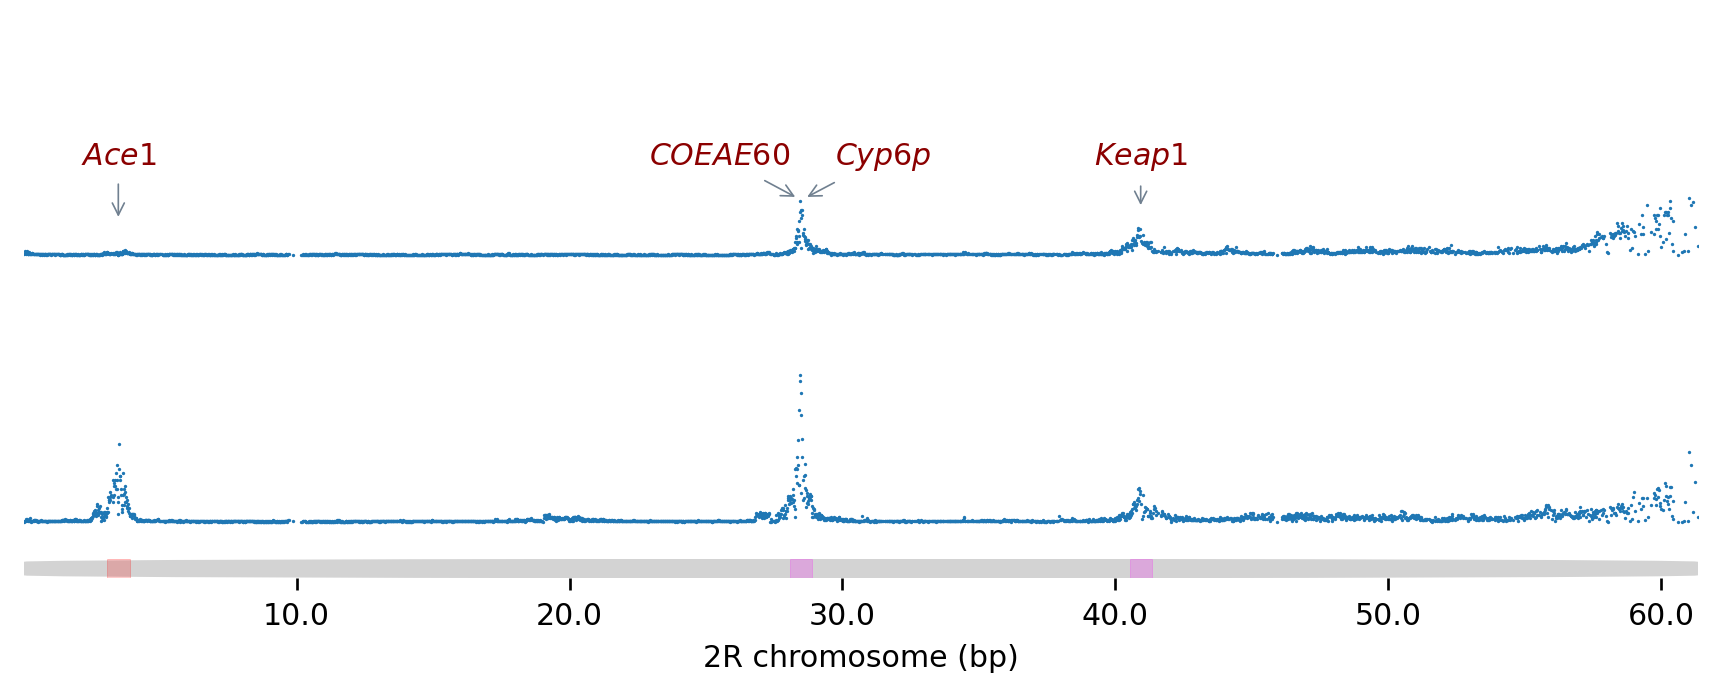

In [47]:
gs = plt.GridSpec(nrows=3, ncols=1, height_ratios=(6,6,0.5))
fig, ax  = plt.subplots(figsize=(9,3))
ax0 = plt.subplot(gs[0,0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax0, ylab=True)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.25), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax1 = plt.subplot(gs[1,0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2017, ax=ax1, ylab=True)
plt.axis('off')
ax2 = plt.subplot(gs[2,0])
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax2,
        facecolor='lightgray', edgecolor='lightgray', xlab='2R chromosome (bp)')
plt.axvspan(3038301, 3897400, color='red', alpha=0.2, lw=0.3)
plt.axvspan(28091242, 28893314, color='magenta', alpha=0.2, lw=0.3)
plt.axvspan(40526764 , 41330610, color='magenta', alpha=0.2, lw=0.3)

<ipython-input-48-0be89df930da>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(gs[0])
<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


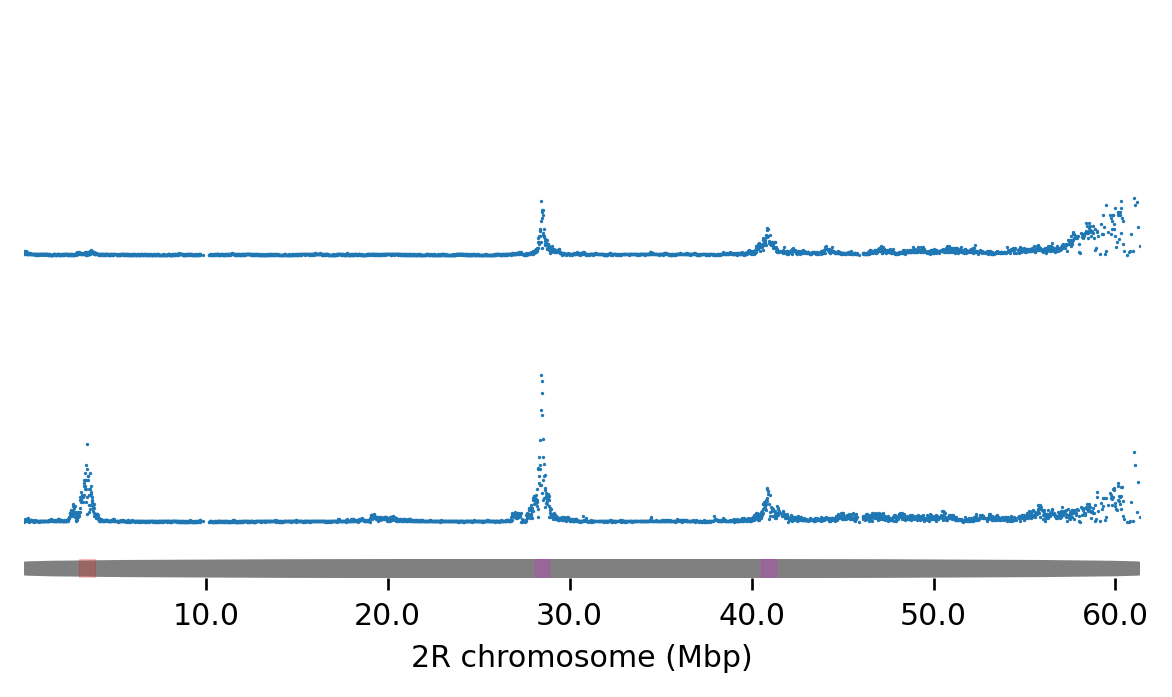

In [48]:
def fig_chrom(data, ax=None, ylab=None, xlab='2R chromosome (Mbp)'):
  pos=list(data.pos)
  if ax is None:
    fig, ax = plt.subplots(figsize=(6, 3))
  ax.set_xticks([])
  plt.axis('off')
  gs = plt.GridSpec(nrows=3, ncols=1, height_ratios=(6,6,0.5))
  ax=plt.subplot(gs[0])
  fig_h121(data.pos, data.gambiae_2012, ax=ax, ylab=ylab)
  plt.axis('off')
  ax = plt.subplot(gs[1])
  fig_h121(data.pos, data.gambiae_2017, ax=ax, ylab=ylab)
  plt.axis('off')
  ax = plt.subplot(gs[2])
  fig_seq(xlim1=pos,xy=(0,0), wh=(pos[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax,facecolor='gray', edgecolor='gray', xlab=xlab)
  #plt.axis('off')
  #ax.set_xticks([])

fig_chrom(data=ydata_2R, ax=None, ylab=None)
plt.axvspan(3038301, 3897400, color='red', alpha=0.2, lw=0.3)
plt.axvspan(28091242, 28893314, color='magenta', alpha=0.2, lw=0.3)
plt.axvspan(40526764 , 41330610, color='magenta', alpha=0.2, lw=0.3)

<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


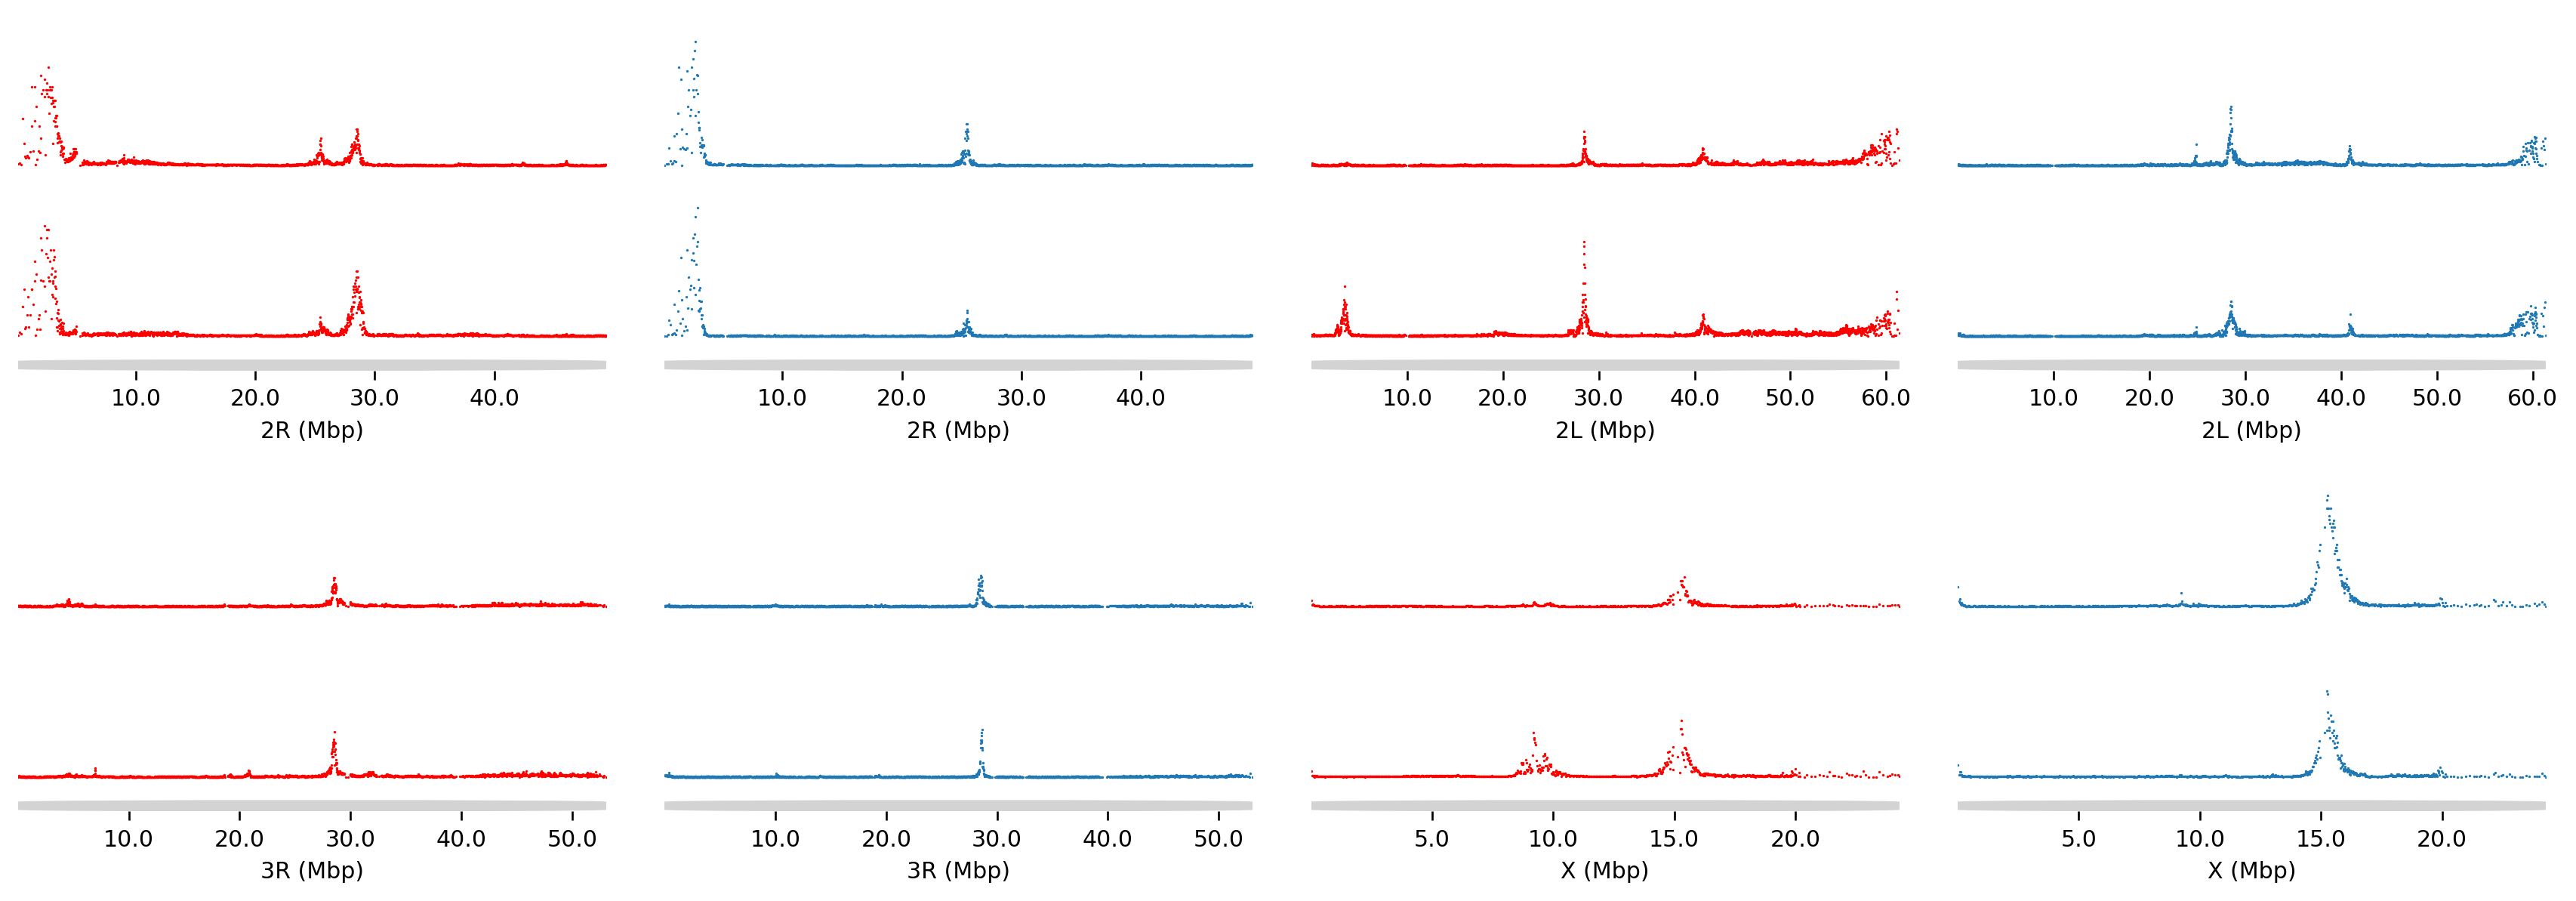

In [49]:
fig = plt.figure(figsize=(18,12))
gs0 = gridspec.GridSpec(4, 4, wspace=0.1, hspace=0.25)

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2L.pos, ydata_2L.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_2L.pos, ydata_2L.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_2L=list(ydata_2L.pos)
fig_seq(pos_2L,xy=(0,0), wh=(pos_2L[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2L.pos, ydata_2L.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_2L.pos, ydata_2L.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_2L,xy=(0,0), wh=(pos_2L[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[2],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_2R=list(ydata_2R.pos)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2L (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[3],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2L (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[4],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_3R.pos, ydata_3R.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_3R.pos, ydata_3R.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_3R=list(ydata_3R.pos)
fig_seq(pos_3R,xy=(0,0), wh=(pos_3R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='3R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[5],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_3R.pos, ydata_3R.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_3R.pos, ydata_3R.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_3R,xy=(0,0), wh=(pos_3R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='3R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[6],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_X.pos, ydata_X.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_X=list(ydata_X.pos)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='X (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[7],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_X.pos, ydata_X.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='X (Mbp)')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom_all_gh121.png", dpi=300, bbox_inches='tight')

<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


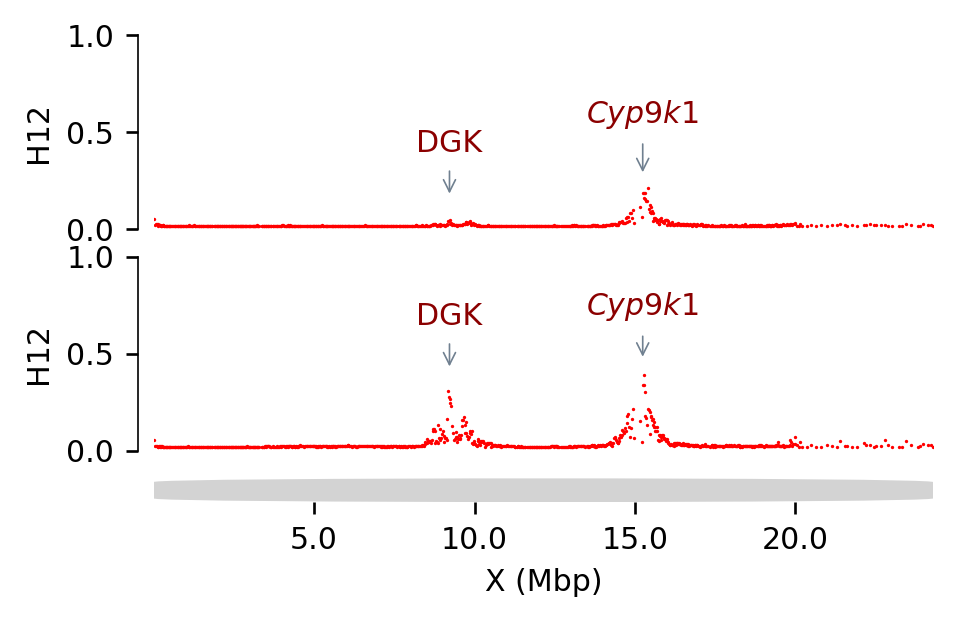

In [50]:
fig = plt.figure(figsize=(18,12))
gs0 = gridspec.GridSpec(4, 4, wspace=0.1, hspace=0.25)

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[5],height_ratios=(4,4,0.5))
ax1 = fig.add_subplot(gs00[0, 0])
sns.despine(ax=ax1, bottom=True, top = True, offset=5)
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.26), xytext=(np.mean([15240572, 15242864]), 0.55), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.40), xytext=(np.mean([9200001,9240000]), 0.65), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.45), xytext=(np.mean([15240572, 15242864]), 0.7), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
sns.despine(ax=ax2, bottom=True, top = True, offset=5)
#plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_X.pos, ydata_X.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_X=list(ydata_X.pos)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='X (Mbp)')

<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


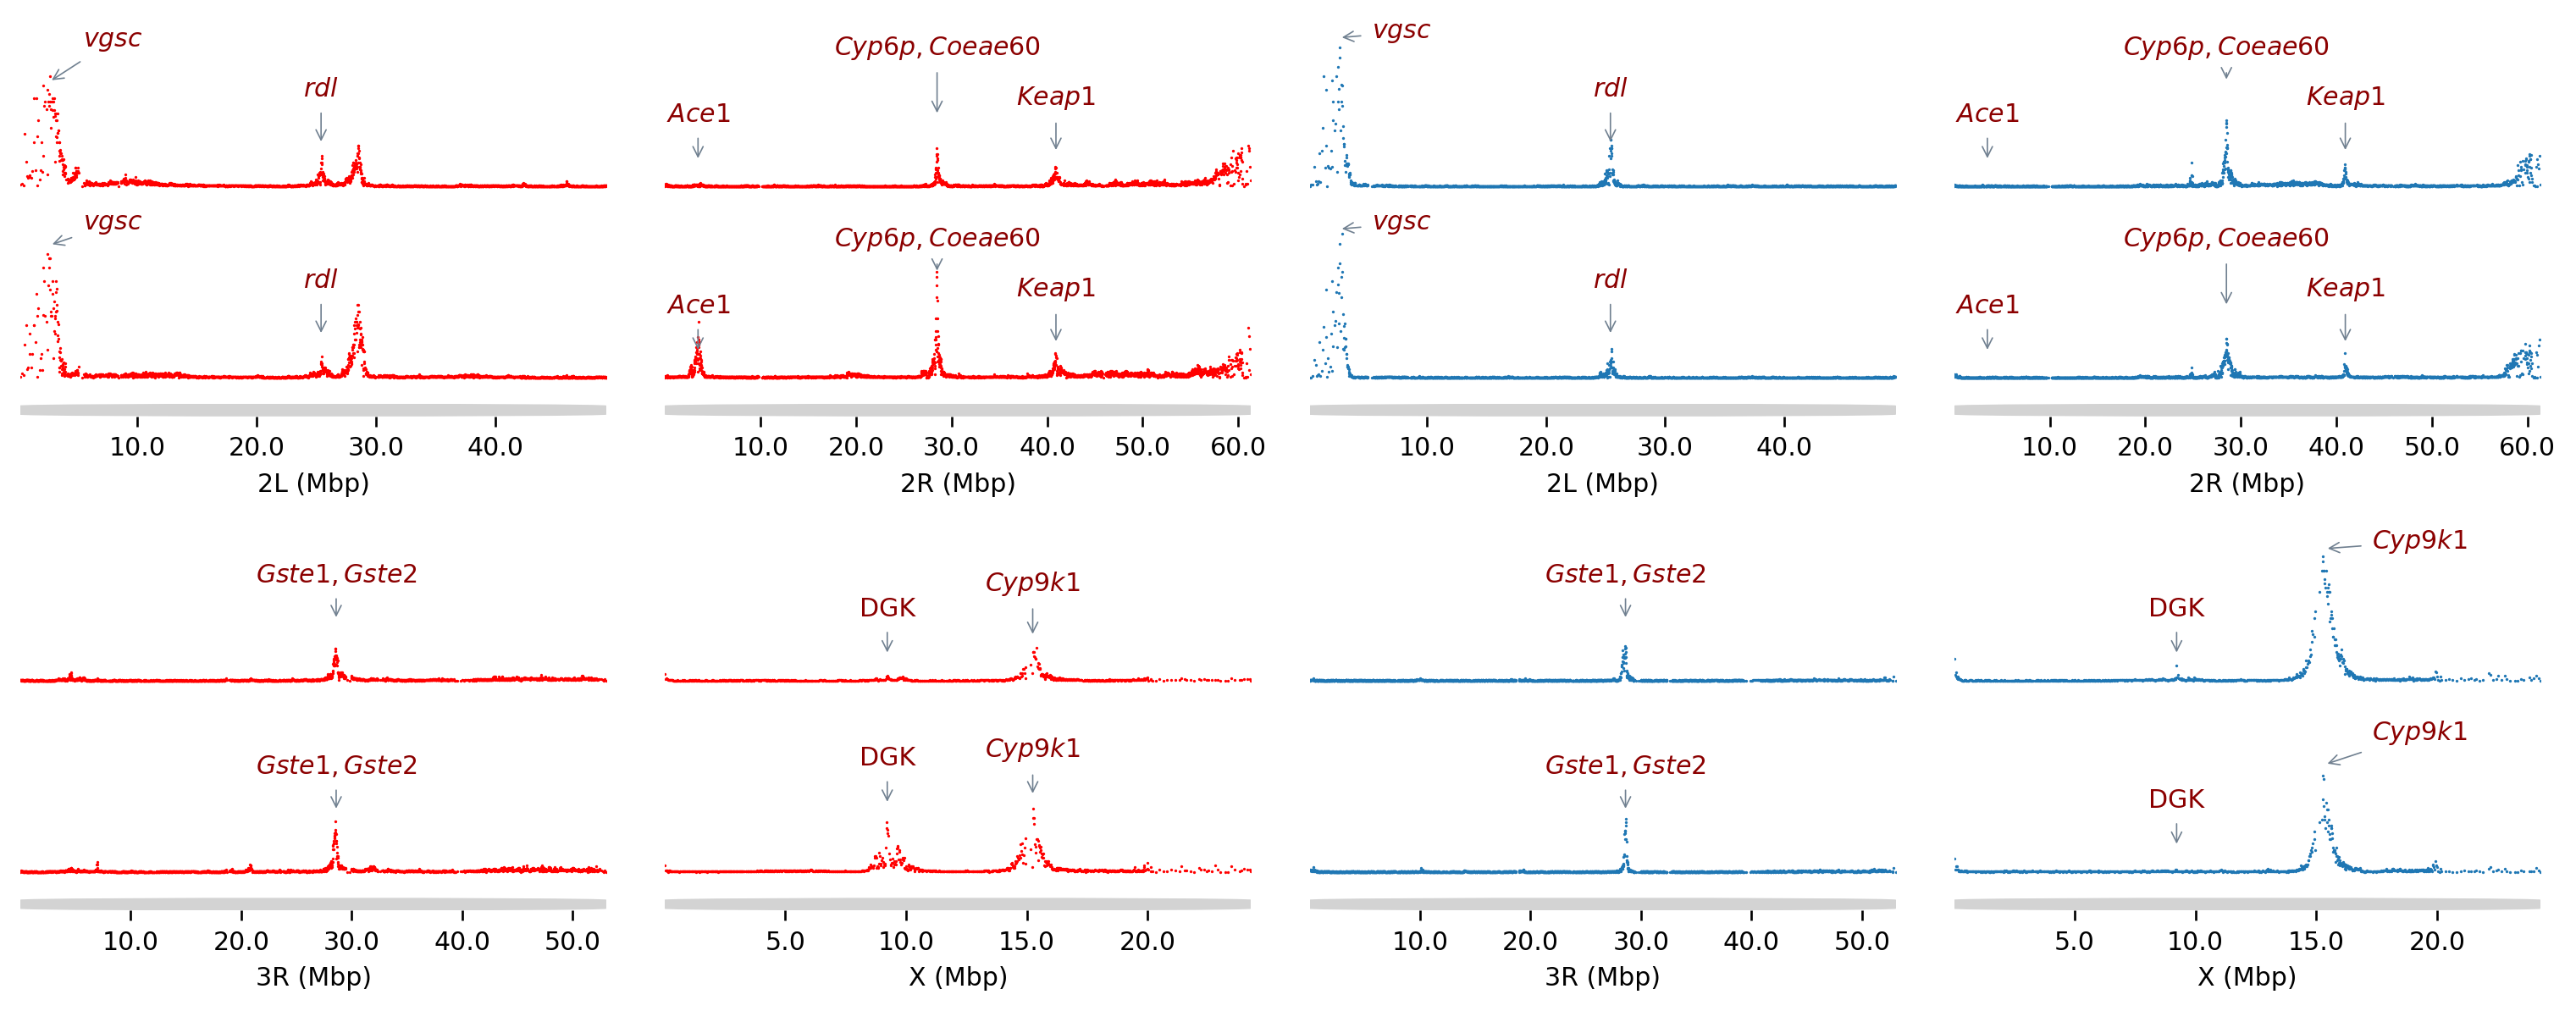

In [51]:
fig = plt.figure(figsize=(16,12))
gs0 = gridspec.GridSpec(4, 4, wspace=0.1, hspace=0.25)

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.63), xytext=(np.mean([7358158, 8431617]), 0.85),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.80), xytext=(np.mean([7358158, 8431617]), 0.90),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2L.pos, ydata_2L.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_2L.pos, ydata_2L.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_2L=list(ydata_2L.pos)
fig_seq(pos_2L,xy=(0,0), wh=(pos_2L[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2L (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([28485262, 28487080]), 0.8), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.62), xytext=(np.mean([28485262, 28487080]), 0.8), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_2R=list(ydata_2R.pos)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2R (Mbp)')

## An. coluzzii
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[2],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.9), xytext=(np.mean([7358158, 8431617]), 0.9),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.9), xytext=(np.mean([7358158, 8431617]), 0.90),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2L.pos, ydata_2L.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_2L.pos, ydata_2L.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_2L,xy=(0,0), wh=(pos_2L[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2L (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[3],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.62), xytext=(np.mean([28485262, 28487080]), 0.8), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([28485262, 28487080]), 0.8), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2R (Mbp)')

## An. gambiae s.s.
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[4],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_3R.pos, ydata_3R.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_3R.pos, ydata_3R.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_3R=list(ydata_3R.pos)
fig_seq(pos_3R,xy=(0,0), wh=(pos_3R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='3R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[5],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.26), xytext=(np.mean([15240572, 15242864]), 0.55), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.40), xytext=(np.mean([9200001,9240000]), 0.65), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.45), xytext=(np.mean([15240572, 15242864]), 0.7), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_X.pos, ydata_X.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_X=list(ydata_X.pos)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='X (Mbp)')

## An. coluzzii
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[6],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_3R.pos, ydata_3R.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_3R.pos, ydata_3R.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_3R,xy=(0,0), wh=(pos_3R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='3R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[7],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.8), xytext=(np.mean([19240572, 19342864]), 0.8), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.65), xytext=(np.mean([19240572, 19342864]), 0.8), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_X.pos, ydata_X.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='X (Mbp)')

#fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom_all_gh12.png", dpi=300, bbox_inches='tight')

<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


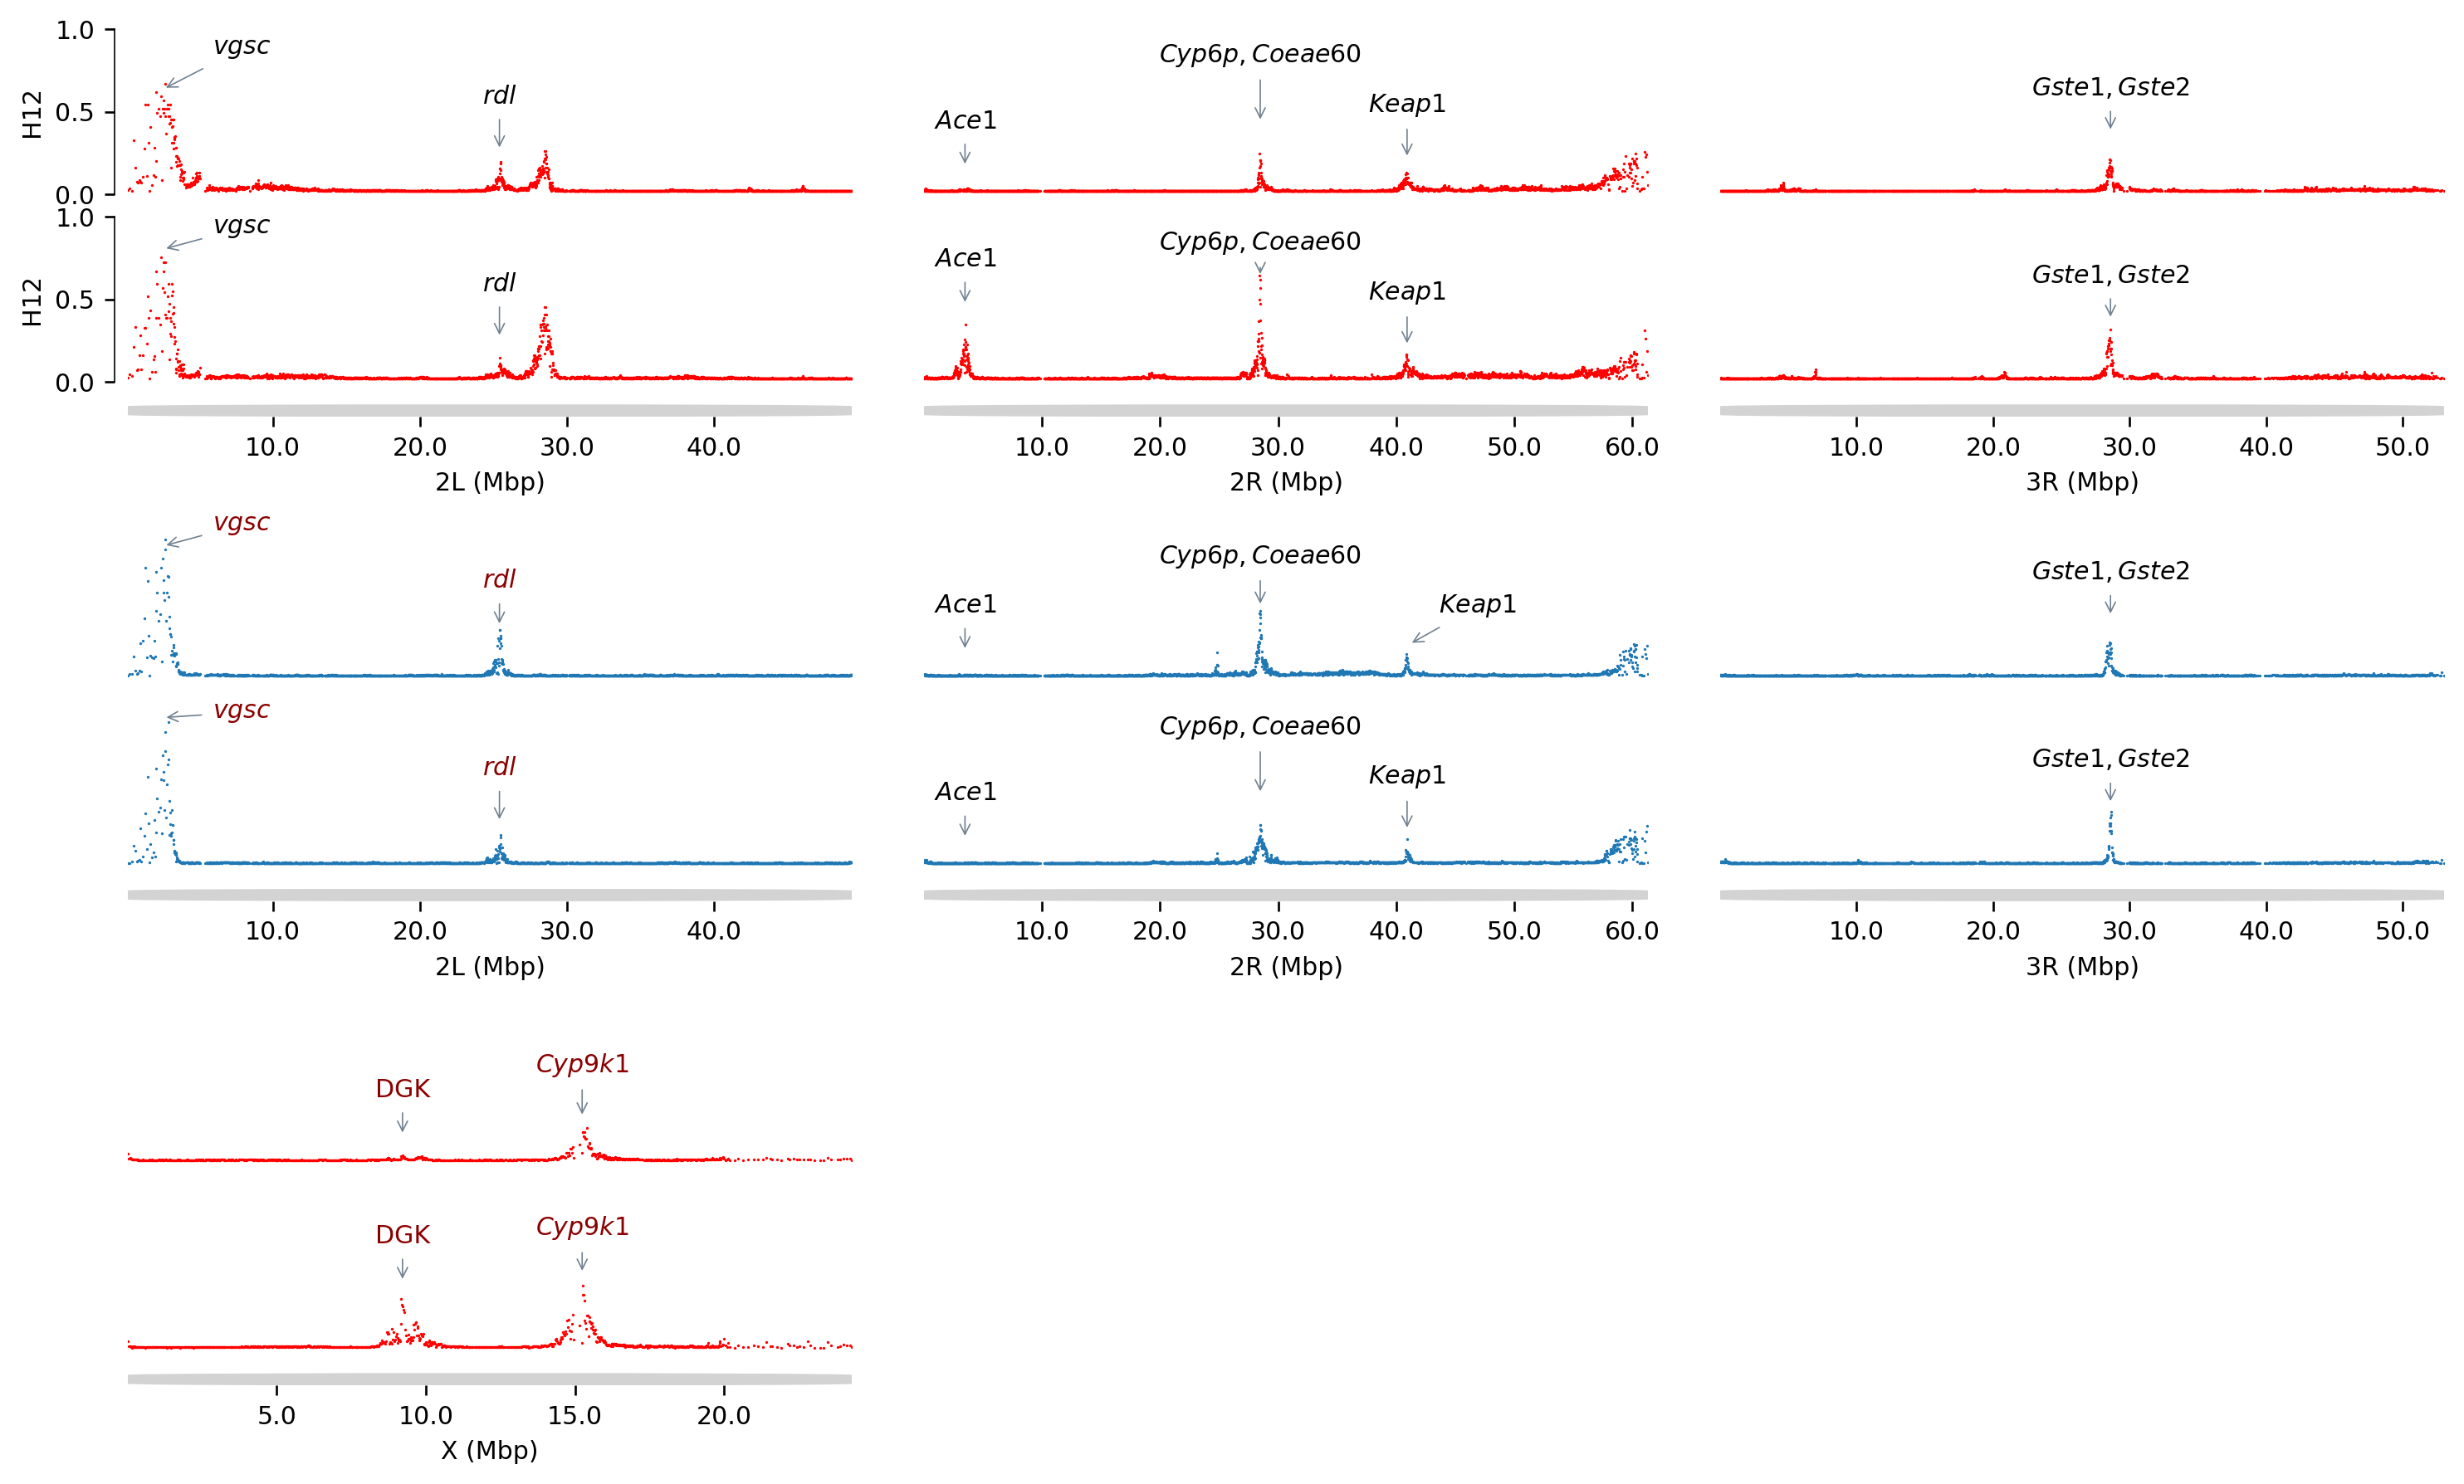

In [52]:
fig = plt.figure(figsize=(15,12))
gs0 = gridspec.GridSpec(4, 3, wspace=0.1, hspace=0.25)

## An. gambiae s.s.
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
sns.despine(ax=ax1, bottom=True, top = True, offset=5)
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.63), xytext=(np.mean([7358158, 8431617]), 0.85),
             color='k', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.55),
             color='k', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.80), xytext=(np.mean([7358158, 8431617]), 0.90),
             color='k', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.55),
             color='k', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axis('off')
sns.despine(ax=ax2, bottom=True, top = True, offset=5)
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2L.pos, ydata_2L.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_2L.pos, ydata_2L.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_2L=list(ydata_2L.pos)
fig_seq(pos_2L,xy=(0,0), wh=(pos_2L[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2L (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([28485262, 28487080]), 0.8), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.45), xytext=(np.mean([3438301, 3497400]), 0.7), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.62), xytext=(np.mean([28485262, 28487080]), 0.8), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_2R=list(ydata_2R.pos)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[2],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='k', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='k', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_3R.pos, ydata_3R.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_3R.pos, ydata_3R.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_3R=list(ydata_3R.pos)
fig_seq(pos_3R,xy=(0,0), wh=(pos_3R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='3R (Mbp)')

## An. coluzzii
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[3],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.8), xytext=(np.mean([7358158, 8431617]), 0.9),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.30), xytext=(np.mean([25363652, 25434556]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.9), xytext=(np.mean([7358158, 8431617]), 0.90),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2L.pos, ydata_2L.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_2L.pos, ydata_2L.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_2L,xy=(0,0), wh=(pos_2L[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2L (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[4],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([28485262, 28487080]), 0.7), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([46926764 , 46930610]), 0.4), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([28485262, 28487080]), 0.8), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='k',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='2R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[5],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='k', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='k', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_3R.pos, ydata_3R.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_3R.pos, ydata_3R.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_3R,xy=(0,0), wh=(pos_3R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='3R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[6],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.26), xytext=(np.mean([15240572, 15242864]), 0.55), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.40), xytext=(np.mean([9200001,9240000]), 0.65), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.45), xytext=(np.mean([15240572, 15242864]), 0.7), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_X.pos, ydata_X.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_X=list(ydata_X.pos)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='X (Mbp)')

<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


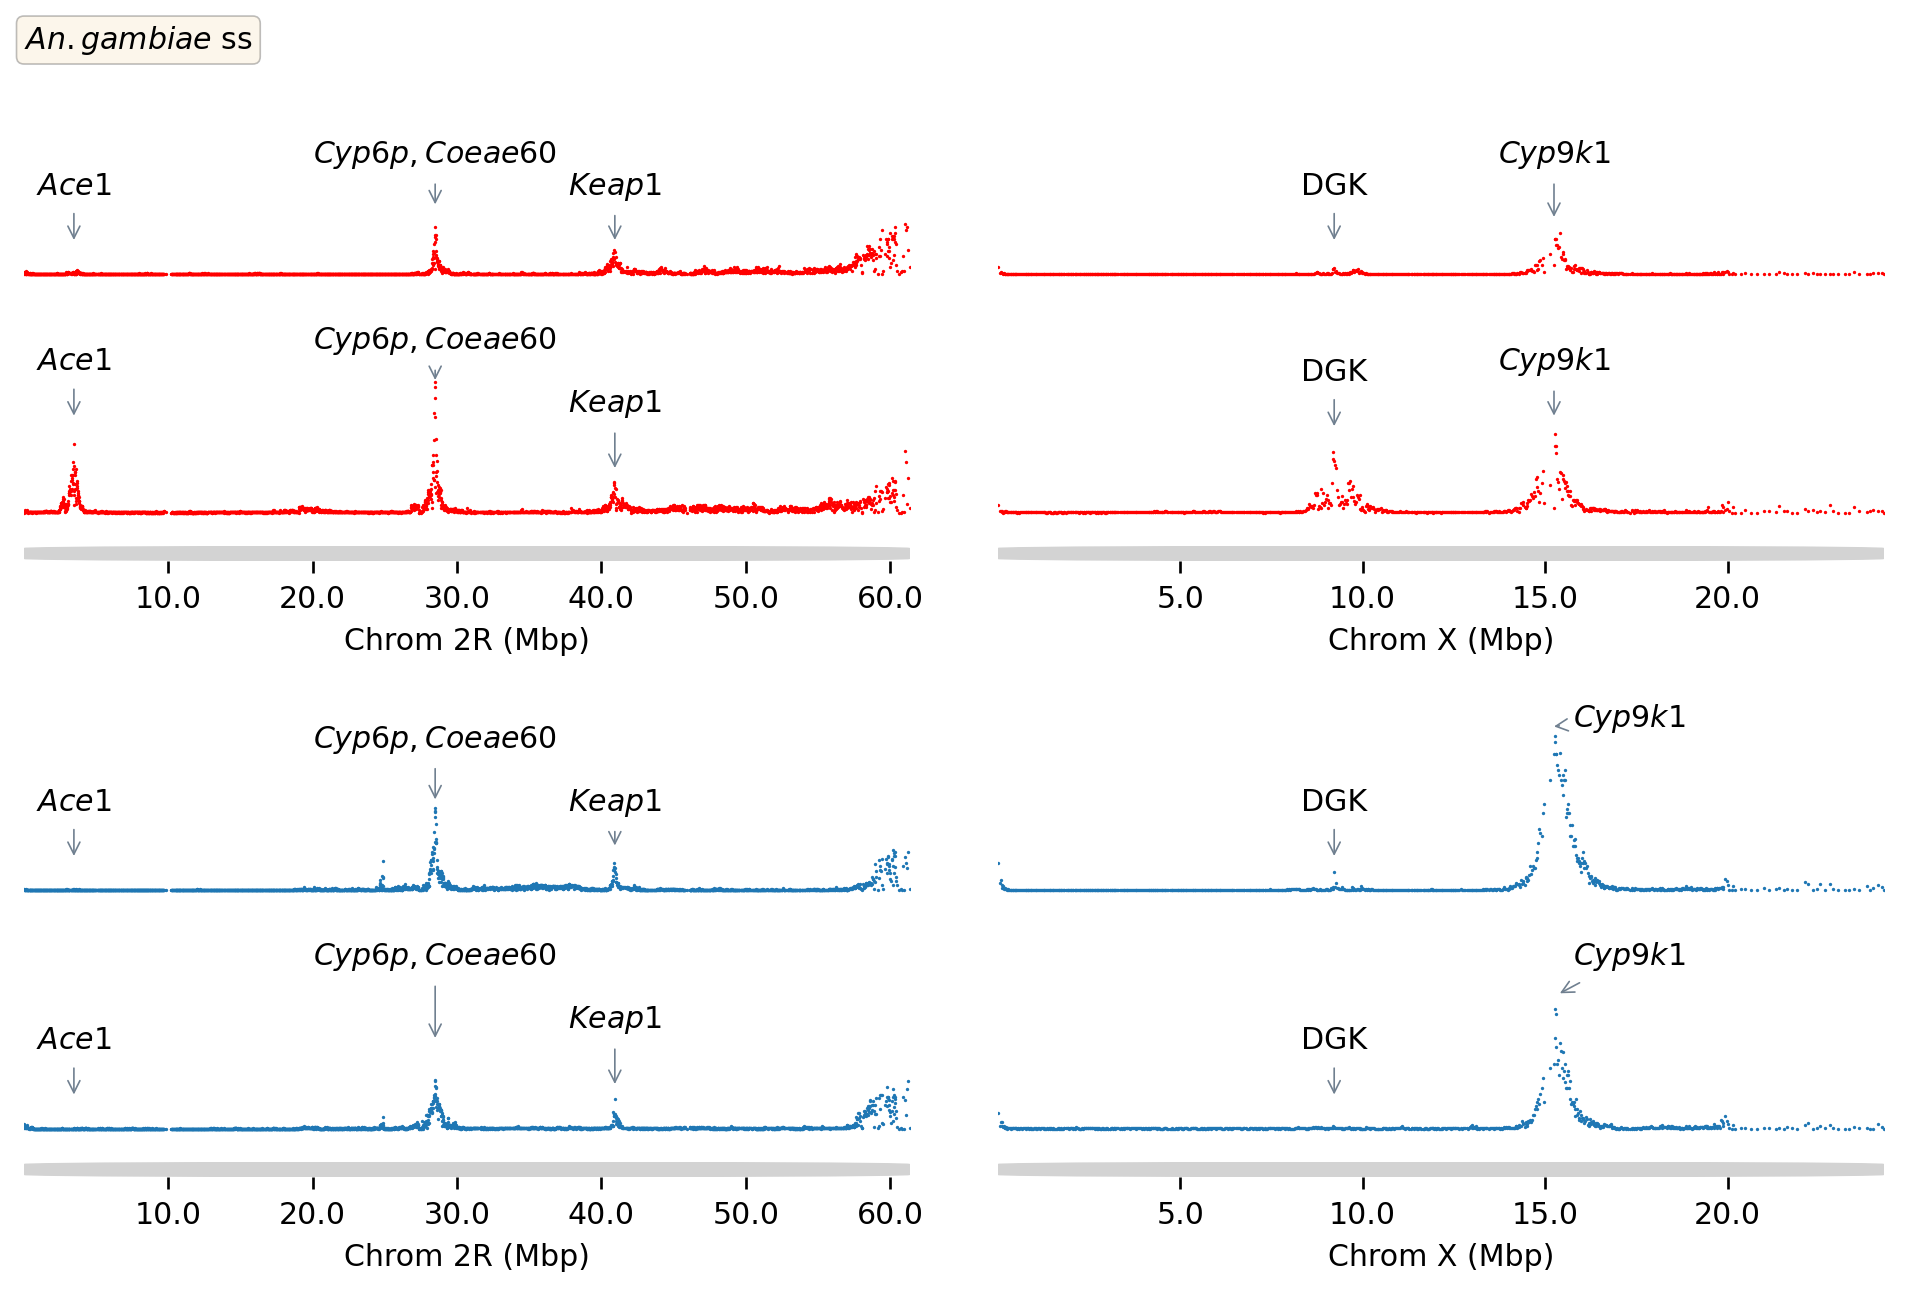

In [53]:
fig = plt.figure(figsize=(10,6))
gs0 = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.25)
fs=9
## An. gambiae s.s.
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
ax1.set_title('$An. gambiae$ ss',loc='left',bbox=dict(facecolor='wheat', edgecolor='black', alpha=0.25, boxstyle='round', pad=0.25))
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.32), xytext=(np.mean([28485262, 28487080]), 0.55), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.15), xytext=(np.mean([40926764 , 40930610]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.45), xytext=(np.mean([3438301, 3497400]), 0.7), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.62), xytext=(np.mean([28485262, 28487080]), 0.8), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_2R=list(ydata_2R.pos)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='Chrom 2R (Mbp)')
###
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.26), xytext=(np.mean([15240572, 15242864]), 0.55), color='k',fontsize=fs,
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.40), xytext=(np.mean([9200001,9240000]), 0.65), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.45), xytext=(np.mean([15240572, 15242864]), 0.7), color='k',fontsize=fs,
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.gambiae_2012, ax=ax1, ylab=True,color='red')
fig_h121(ydata_X.pos, ydata_X.gambiae_2017, ax=ax2, ylab=True,color='red')
pos_X=list(ydata_X.pos)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='Chrom X (Mbp)')

##An. coluzzii
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[2],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([28485262, 28487080]), 0.7), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([28485262, 28487080]), 0.8), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='Chrom 2R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[3],height_ratios=(4,4,0.3))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.8), xytext=(np.mean([17240572, 17342864]), 0.8), color='k',fontsize=fs,
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.65), xytext=(np.mean([17240572, 17342864]), 0.8), color='k',fontsize=fs,
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.coluzzii_2012, ax=ax1, ylab=True)
fig_h121(ydata_X.pos, ydata_X.coluzzii_2017, ax=ax2, ylab=True)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='Chrom X (Mbp)')

In [30]:
label_sp = ['2012', '2017']
col_pal = ['navy', 'brown']

<ipython-input-43-e31b38fe1d8a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)/1000000) for x in ax.get_xticks()])


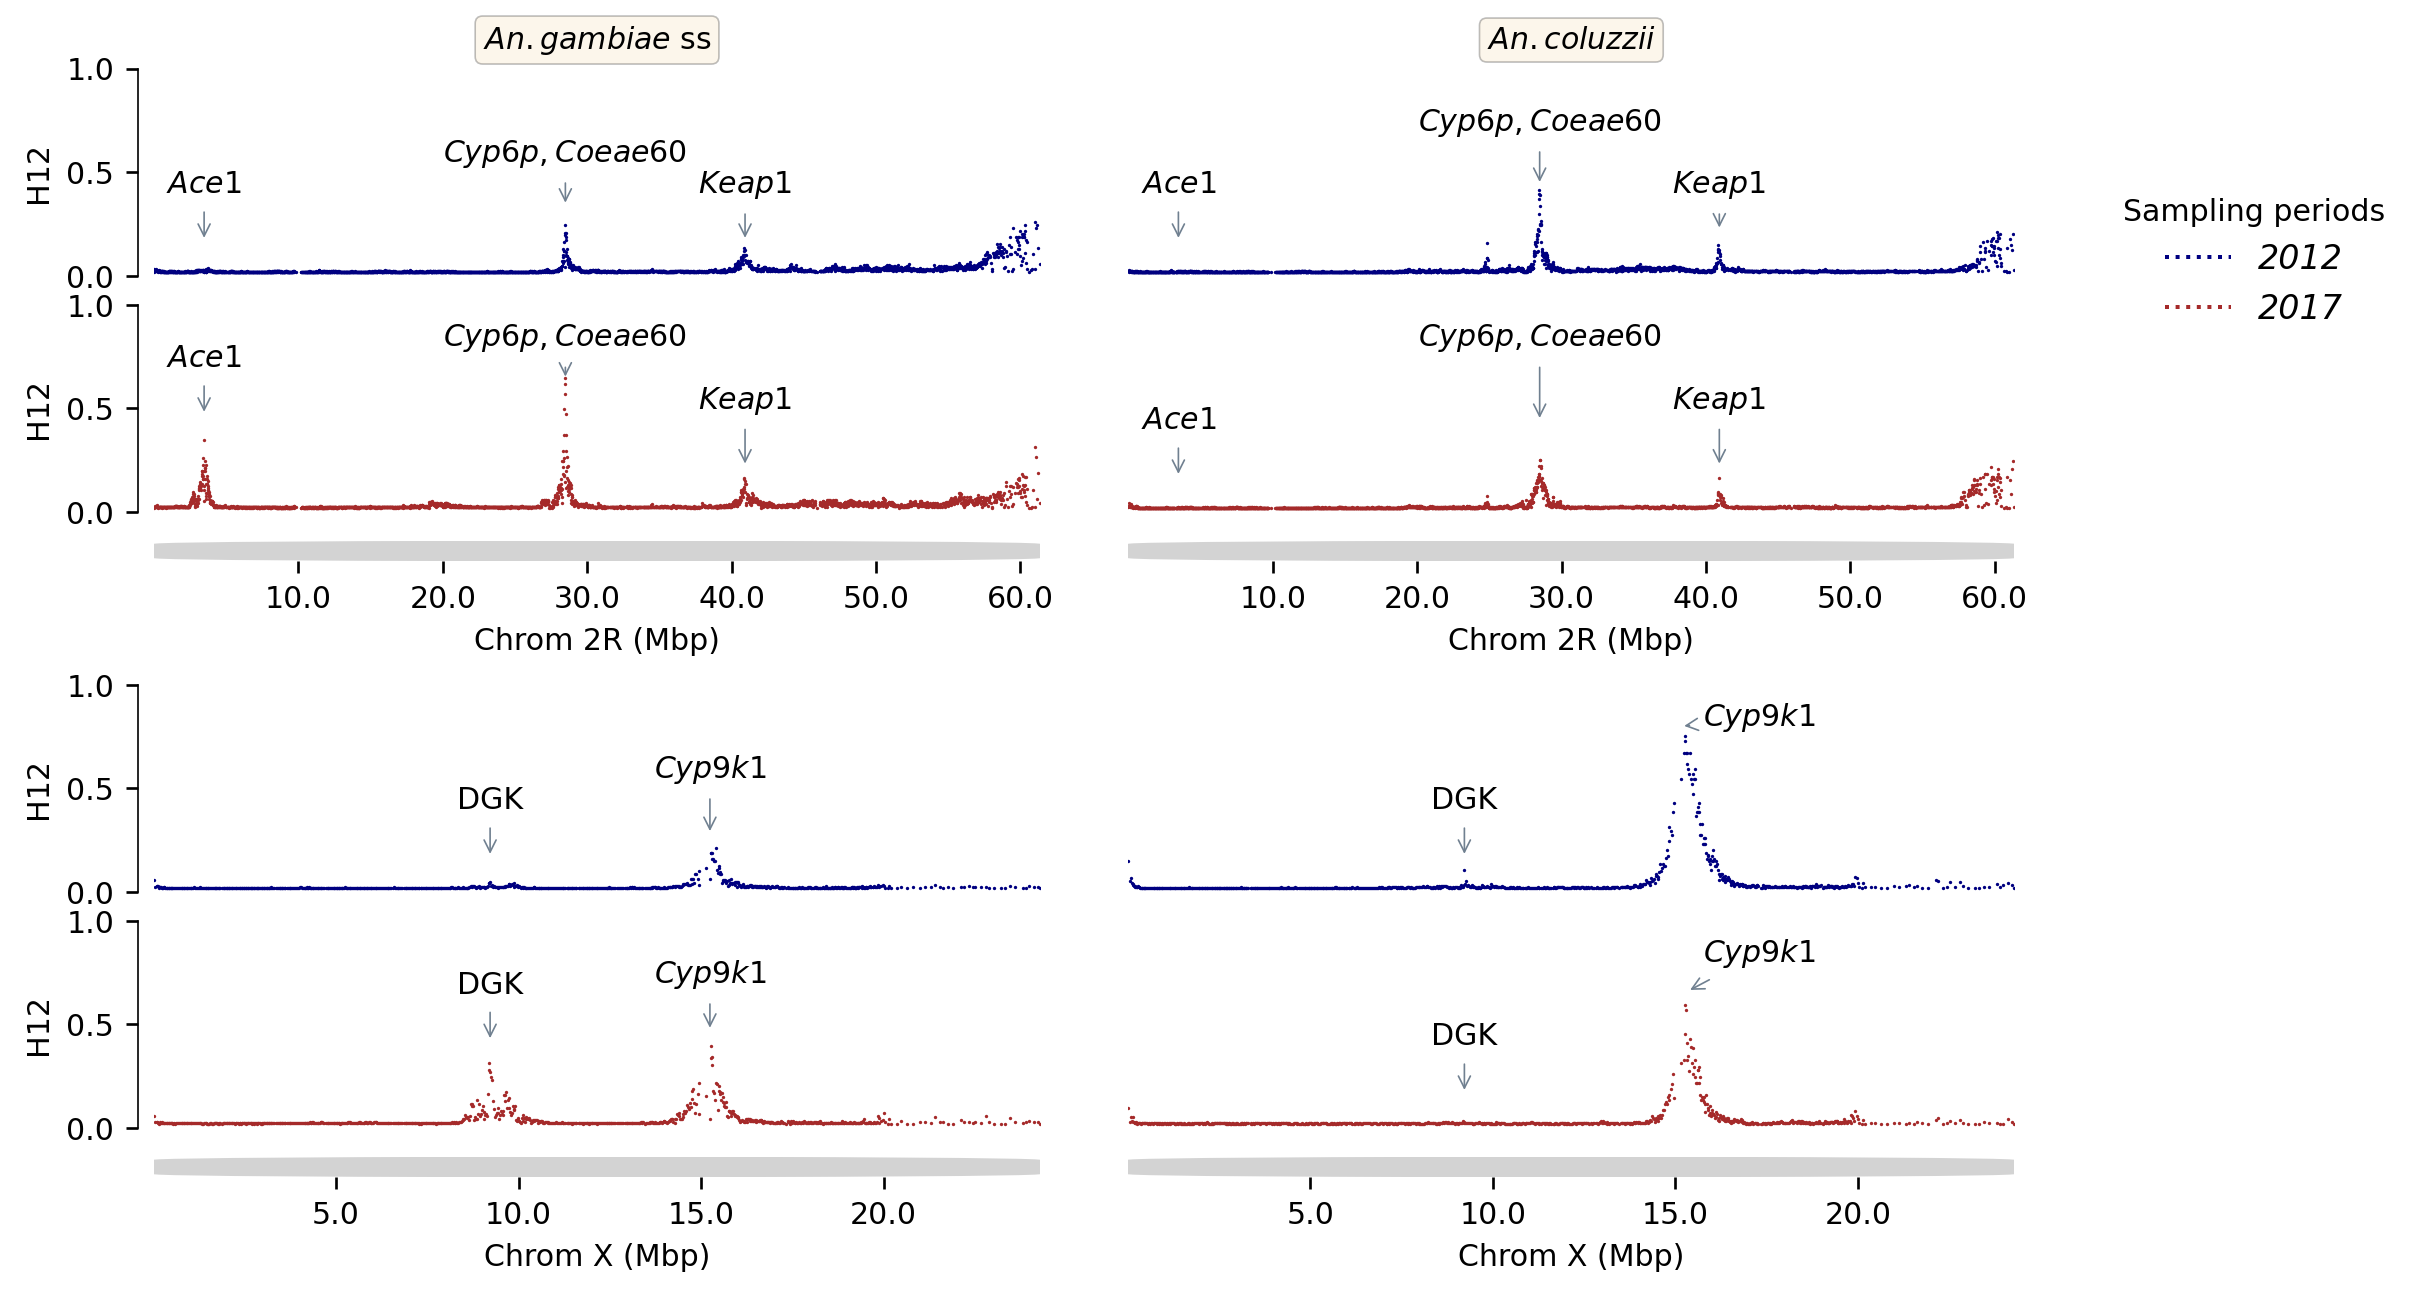

In [54]:
fig = plt.figure(figsize=(10,6))
gs0 = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.25)
fs=9
c_2012 = 'navy'
c_2017='brown'
## An. gambiae s.s.
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0],height_ratios=(4,4,0.4))
ax1 = fig.add_subplot(gs00[0, 0])
ax1.set_title('$An. gambiae$ ss',loc='center',bbox=dict(facecolor='wheat', edgecolor='black', alpha=0.25, boxstyle='round', pad=0.25))
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.32), xytext=(np.mean([28485262, 28487080]), 0.55), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.15), xytext=(np.mean([40926764 , 40930610]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

sns.despine(ax=ax1, bottom=True, top = True, offset=5)
#plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.45), xytext=(np.mean([3438301, 3497400]), 0.7), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.62), xytext=(np.mean([28485262, 28487080]), 0.8), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

sns.despine(ax=ax2, bottom=True, top = True, offset=5)
#plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax1, ylab=True,color=c_2012)
fig_h121(ydata_2R.pos, ydata_2R.gambiae_2017, ax=ax2, ylab=True,color=c_2017)
pos_2R=list(ydata_2R.pos)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='Chrom 2R (Mbp)')
###
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[2],height_ratios=(4,4,0.4))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.26), xytext=(np.mean([15240572, 15242864]), 0.55), color='k',fontsize=fs,
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
sns.despine(ax=ax1, bottom=True, top = True, offset=5)
#plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.40), xytext=(np.mean([9200001,9240000]), 0.65), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.45), xytext=(np.mean([15240572, 15242864]), 0.7), color='k',fontsize=fs,
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
sns.despine(ax=ax2, bottom=True, top = True, offset=5)
#plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.gambiae_2012, ax=ax1, ylab=True,color=c_2012)
fig_h121(ydata_X.pos, ydata_X.gambiae_2017, ax=ax2, ylab=True,color=c_2017)
pos_X=list(ydata_X.pos)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='Chrom X (Mbp)')

##An. coluzzii
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1],height_ratios=(4,4,0.4))
ax1 = fig.add_subplot(gs00[0, 0])
ax1.set_title('$An. coluzzii$',loc='center',bbox=dict(facecolor='wheat', edgecolor='black', alpha=0.25, boxstyle='round', pad=0.25))
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([28485262, 28487080]), 0.7), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#sns.despine(ax=ax1, bottom=True, top = True, offset=5)
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p,Coeae60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([28485262, 28487080]), 0.8), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.5), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#sns.despine(ax=ax2, bottom=True, top = True, offset=5)
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2012, ax=ax1, ylab=True, color=c_2012)
fig_h121(ydata_2R.pos, ydata_2R.coluzzii_2017, ax=ax2, ylab=True,color=c_2017)
fig_seq(pos_2R,xy=(0,0), wh=(pos_2R[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='Chrom 2R (Mbp)')

gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[3],height_ratios=(4,4,0.4))
ax1 = fig.add_subplot(gs00[0, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.8), xytext=(np.mean([17240572, 17342864]), 0.8), color='k',fontsize=fs,
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#sns.despine(ax=ax1, bottom=True, top = True, offset=5)
plt.axis('off')
ax2 = fig.add_subplot(gs00[1, 0])
plt.annotate('DGK', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='k',fontsize=fs,
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.65), xytext=(np.mean([17240572, 17342864]), 0.8), color='k',fontsize=fs,
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#sns.despine(ax=ax2, bottom=True, top = True, offset=5)
plt.axis('off')
ax3 = fig.add_subplot(gs00[2, 0])
fig_h121(ydata_X.pos, ydata_X.coluzzii_2012, ax=ax1, ylab=True,color=c_2012)
fig_h121(ydata_X.pos, ydata_X.coluzzii_2017, ax=ax2, ylab=True,color=c_2017)
fig_seq(pos_X,xy=(0,0), wh=(pos_X[-1],0.05),boxstyle=("Round4, pad=0.1"), ax=ax3,
        facecolor='lightgray', edgecolor='lightgray', xlab='Chrom X (Mbp)')

cmap = dict(zip(label_sp, col_pal))
#patches = [Patch(color=v, label=k) for k, v in cmap.items()]
#patches = [mpl.patches.Patch(color=v, label=k) for k, v in cmap.items]
lines = [Line2D([0], [0], color=v, label=k, linewidth=1.2, linestyle='dotted') for k, v in cmap.items()]
fig.legend(title='Sampling periods', labels=label_sp, handles=lines, bbox_to_anchor=(1.06, 0.8), loc='upper right',
           borderaxespad=0,ncol=1, frameon=False, prop={'size':10, 'style': 'italic'})
fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom_all_gh12.png", dpi=300, bbox_inches='tight')